# importing library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,Good


In [5]:
df.shape 

(150002, 18)

### Before preprocessing we split the data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.iloc[: , :-1] # independent variables 
y = df.iloc[: , -1]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.1,random_state=11)

In [9]:
X_train.shape , X_test.shape, Y_test.shape, Y_train.shape

((135001, 17), (15001, 17), (15001,), (135001,))

In [10]:
Y_train

149883    Good
34945      Bad
120143    Good
56652     Good
17440     Good
          ... 
102327    Good
97617     Good
21584     Good
36543     Good
141209    Good
Name: Good_Bad, Length: 135001, dtype: object

In [11]:
len(X_train) , len(Y_train)

(135001, 135001)

In [12]:
# combining the data independet and dependent 

training_data = pd.concat([X_train , Y_train] , axis = 1)

In [13]:
training_data.shape

(135001, 18)

In [14]:
## gathering the information based on pandas

training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135001 entries, 149883 to 141209
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            134999 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  134999 non-null  float64
 2   age                                   134999 non-null  float64
 3   Gender                                134999 non-null  object 
 4   Region                                134999 non-null  object 
 5   MonthlyIncome                         108210 non-null  float64
 6   Rented_OwnHouse                       134999 non-null  object 
 7   Occupation                            134999 non-null  object 
 8   Education                             134999 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  134999 non-null  float64
 10  DebtRatio                             134999 non-null  float64


### let's find if we have null values

In [15]:
training_data.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           26791
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         26791
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3573
Good_Bad                                    2
dtype: int64

In [16]:
training_data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome.1',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad'],
      dtype='object')

In [17]:
## all the columns have one incomplete values let's figure out what is the problem
training_data[training_data['NPA Status'] == 'NaN']

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad


In [18]:
# deleting 2 rows having null values

training_data[training_data['NPA Status'].isnull()].index

Int64Index([150000, 150001], dtype='int64')

In [19]:
training_data[training_data['Gender'].isnull()].index

Int64Index([150000, 150001], dtype='int64')

In [20]:
training_data = training_data.drop([150001,150000],axis=0)

In [21]:
training_data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           26789
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome.1                         26789
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3573
Good_Bad                                    0
dtype: int64

In [22]:
training_data['MonthlyIncome'].head()

149883     8960.0
34945      2120.0
120143    17500.0
56652      5000.0
17440      2750.0
Name: MonthlyIncome, dtype: float64

In [23]:
training_data['MonthlyIncome.1'].head()

149883     8960.0
34945      2120.0
120143    17500.0
56652      5000.0
17440      2750.0
Name: MonthlyIncome.1, dtype: float64

In [24]:
#the above columns data looks similar lets drop one 
training_data = training_data.drop(['MonthlyIncome.1'],axis=1)

In [25]:
training_data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           26789
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3573
Good_Bad                                    0
dtype: int64

## handling the null value

In [26]:
import re

In [27]:
training_data['NumberOfDependents'].isnull().sum()

3573

In [28]:
training_data[training_data['NumberOfDependents'].isnull()].head(1)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
59646,0.0,0.02171,72.0,Male,Central,NaN,Ownhouse,Officer2,Professional,0.0,139.0,10.0,0.0,1.0,0.0,NaN,Good


In [29]:
training_data['NumberOfDependents'].dtype

dtype('O')

In [30]:
training_data['NumberOfDependents'] = pd.to_numeric(training_data['NumberOfDependents'])

In [31]:
training_data['NumberOfDependents'].dtype

dtype('float64')

In [32]:
mean = training_data['NumberOfDependents'].mean()
median = training_data['NumberOfDependents'].median()
mode = training_data['NumberOfDependents'].mode()[0]


In [33]:
print(f'mean of NumberOfDependents column is {mean}')
print(f'median of NumberOfDependents column is {median}')
print(f'mode of NumberOfDependents column is {mode}')

mean of NumberOfDependents column is 0.7576354754766941
median of NumberOfDependents column is 0.0
mode of NumberOfDependents column is 0.0


In [34]:
def null_logic(training_data,var,val):
    training_data[var+'_mean_replaced']= training_data[var].fillna(val)
null_logic(training_data,'NumberOfDependents',mean)

In [35]:
def null_logic(training_data,var,val):
    training_data[var+'_median_replaced']= training_data[var].fillna(val)
null_logic(training_data,'NumberOfDependents',median)

In [36]:
def null_logic(training_data,var,val):
    training_data[var+'_mode_replaced']= training_data[var].fillna(val)
null_logic(training_data,'NumberOfDependents',mode)

In [37]:
training_data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad', 'NumberOfDependents_mean_replaced',
       'NumberOfDependents_median_replaced',
       'NumberOfDependents_mode_replaced'],
      dtype='object')

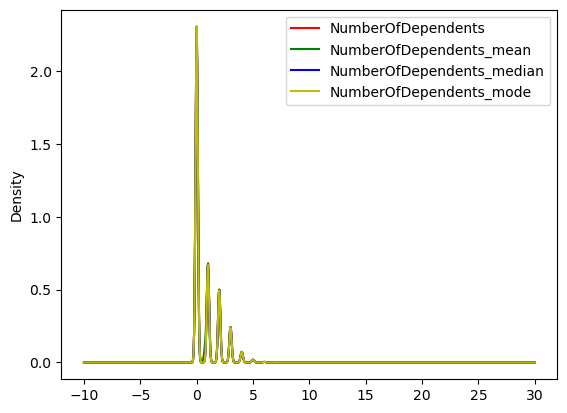

In [38]:
fig= plt.figure()
ax = fig.add_subplot(1,1,1)
training_data['NumberOfDependents'].plot(kind = 'kde' , ax = ax,color = 'r',label = 'NumberOfDependents')
training_data['NumberOfDependents_mean_replaced'].plot(kind = 'kde' , ax = ax,color = 'g',label = 'NumberOfDependents_mean')
training_data['NumberOfDependents_median_replaced'].plot(kind = 'kde' , ax = ax,color = 'b',label = 'NumberOfDependents_median')
training_data['NumberOfDependents_mode_replaced'].plot(kind = 'kde' , ax = ax,color = 'y',label = 'NumberOfDependents_mode')
plt.legend(loc = 0)
plt.show()

In [39]:
training_data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad', 'NumberOfDependents_mean_replaced',
       'NumberOfDependents_median_replaced',
       'NumberOfDependents_mode_replaced'],
      dtype='object')

In [40]:
print('std with original variable : ',training_data['NumberOfDependents'].std())
print('std with Mean_replaced variable : ',training_data['NumberOfDependents_mean_replaced'].std())
print('std with Median_replaced variable : ',training_data['NumberOfDependents_median_replaced'].std())
print('std with Mode_replaced variable : ',training_data['NumberOfDependents_mode_replaced'].std())

std with original variable :  1.1153006209039351
std with Mean_replaced variable :  1.100442283969006
std with Median_replaced variable :  1.1071420512947108
std with Mode_replaced variable :  1.1071420512947108


In [41]:
# we could see that mean value fits perfectly so we would be drapping all other columns except the mean one
training_data = training_data.drop(['NumberOfDependents','NumberOfDependents_median_replaced','NumberOfDependents_mode_replaced'],axis=1)


In [42]:
training_data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'Good_Bad', 'NumberOfDependents_mean_replaced'],
      dtype='object')

In [43]:
training_data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           26789
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
Good_Bad                                    0
NumberOfDependents_mean_replaced            0
dtype: int64

In [44]:
mean= training_data['MonthlyIncome'].mean()
median= training_data['MonthlyIncome'].median()
mode= training_data['MonthlyIncome'].mode()[0]

In [45]:
print(f'mean of MonthlyIncome column is {mean}')
print(f'median of MonthlyIncome column is {median}')
print(f'mode of MonthlyIncome column is {mode}')

mean of MonthlyIncome column is 6662.60994362813
median of MonthlyIncome column is 5400.0
mode of MonthlyIncome column is 5000.0


In [46]:
# Monthly income have a lot of null value so we will find the best fit
def null_logic(training_data,var,val):
    training_data[var+'_mean_replaced']= training_data[var].fillna(val)
null_logic(training_data,'MonthlyIncome',mean)
def null_logic(training_data,var,val):
    training_data[var+'_median_replaced']= training_data[var].fillna(val)
null_logic(training_data,'MonthlyIncome',median)
def null_logic(training_data,var,val):
    training_data[var+'_mode_replaced']= training_data[var].fillna(val)
null_logic(training_data,'MonthlyIncome',mode)

In [47]:
training_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Good_Bad,NumberOfDependents_mean_replaced,MonthlyIncome_mean_replaced,MonthlyIncome_median_replaced,MonthlyIncome_mode_replaced
149883,0.0,0.004145,48.0,Male,North,8960.0,Rented,Officer2,Professional,0.0,0.248633,5.0,0.0,2.0,0.0,Good,3.0,8960.0,8960.0,8960.0
34945,1.0,1.000000,32.0,Male,West,2120.0,Ownhouse,Self_Emp,Matric,3.0,0.813767,3.0,0.0,1.0,0.0,Bad,4.0,2120.0,2120.0,2120.0
120143,0.0,0.413995,58.0,Male,West,17500.0,Ownhouse,Self_Emp,Graduate,0.0,0.236386,9.0,0.0,2.0,0.0,Good,0.0,17500.0,17500.0,17500.0
56652,0.0,0.437853,74.0,Male,East,5000.0,Rented,Non-officer,Professional,0.0,0.259748,12.0,0.0,0.0,0.0,Good,1.0,5000.0,5000.0,5000.0
17440,0.0,0.370125,36.0,Male,North,2750.0,Ownhouse,Self_Emp,Post-Grad,0.0,0.497274,8.0,0.0,2.0,1.0,Good,3.0,2750.0,2750.0,2750.0


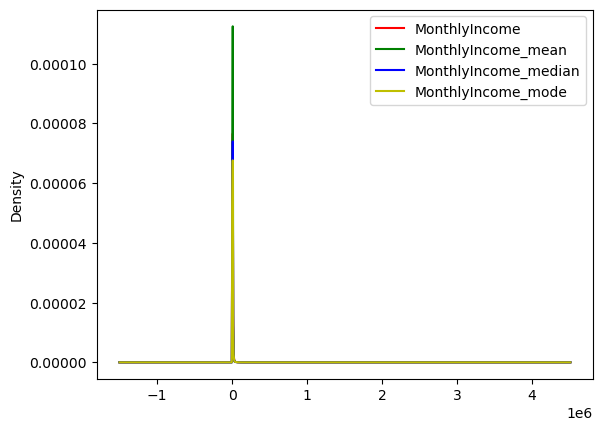

In [48]:
fig= plt.figure()
ax = fig.add_subplot(1,1,1)
training_data['MonthlyIncome'].plot(kind = 'kde' , ax = ax,color = 'r',label = 'MonthlyIncome')
training_data['MonthlyIncome_mean_replaced'].plot(kind = 'kde' , ax = ax,color = 'g',label = 'MonthlyIncome_mean')
training_data['MonthlyIncome_median_replaced'].plot(kind = 'kde' , ax = ax,color = 'b',label = 'MonthlyIncome_median')
training_data['MonthlyIncome_mode_replaced'].plot(kind = 'kde' , ax = ax,color = 'y',label = 'MonthlyIncome_mode')
plt.legend(loc = 0)
plt.show()

In [49]:
print('the standard deviation of MonthlyIncome is ',training_data['MonthlyIncome'].std())
print('the standard deviation of MonthlyIncome_mean_replaced is ',training_data['MonthlyIncome_mean_replaced'].std())
print('the standard deviation of MonthlyIncome_median is ',training_data['MonthlyIncome_median_replaced'].std())
print('the standard deviation of MonthlyIncome_mode_replaced is ',training_data['MonthlyIncome_mode_replaced'].std())

the standard deviation of MonthlyIncome is  13870.003606951876
the standard deviation of MonthlyIncome_mean_replaced is  12417.798219156535
the standard deviation of MonthlyIncome_median is  12428.004121250257
the standard deviation of MonthlyIncome_mode_replaced is  12435.489648012473


In [50]:
# as we can see mode is the closest standard deviation to the original column we will be drop all the other coulmns
training_data = training_data.drop(['MonthlyIncome','MonthlyIncome_mean_replaced','MonthlyIncome_median_replaced'],axis=1)
training_data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'Good_Bad', 'NumberOfDependents_mean_replaced',
       'MonthlyIncome_mode_replaced'],
      dtype='object')

## filling null values in the test data

In [51]:
testing_data = pd.concat([X_test , Y_test],axis = 1)

In [52]:
testing_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
77511,0.0,0.008432,63.0,Female,Central,NaN,Ownhouse,Officer2,Professional,0.0,3847.000000,NaN,11.0,0.0,2.0,0.0,0.0,Good
17422,0.0,0.000000,51.0,Male,North,11000.0,Ownhouse,Self_Emp,Post-Grad,0.0,0.153895,11000.0,4.0,0.0,1.0,1.0,2.0,Good
111815,0.0,0.660261,28.0,Female,South,5625.0,Ownhouse,Self_Emp,Matric,0.0,0.157128,5625.0,6.0,0.0,0.0,0.0,0.0,Good
34211,0.0,1.000000,63.0,Female,North,42800.0,Ownhouse,Self_Emp,PhD,0.0,0.204014,42800.0,9.0,0.0,3.0,0.0,1.0,Good
36739,0.0,0.586124,42.0,Male,North,5200.0,Ownhouse,Self_Emp,Matric,0.0,0.304365,5200.0,17.0,0.0,0.0,0.0,0.0,Good


In [53]:
testing_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           2942
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome.1                         2942
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       351
Good_Bad                                   0
dtype: int64

In [54]:
testing_data = testing_data.drop(['MonthlyIncome.1'],axis = 1)

In [55]:
testing_data['NumberOfDependents'] = pd.to_numeric(testing_data['NumberOfDependents'])

In [56]:
testing_data['NumberOfDependents_mean_replaced'] = testing_data['NumberOfDependents'].fillna(0.7568511389400325)
testing_data['MonthlyIncome_mode_replaced'] = testing_data['MonthlyIncome'].fillna(mode)

In [57]:
testing_data.isnull().sum()

NPA Status                                 0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
Gender                                     0
Region                                     0
MonthlyIncome                           2942
Rented_OwnHouse                            0
Occupation                                 0
Education                                  0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       351
Good_Bad                                   0
NumberOfDependents_mean_replaced           0
MonthlyIncome_mode_replaced                0
dtype: int64

In [58]:
testing_data = testing_data.drop(['MonthlyIncome','NumberOfDependents'],axis=1)

In [59]:
testing_data.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
Good_Bad                                0
NumberOfDependents_mean_replaced        0
MonthlyIncome_mode_replaced             0
dtype: int64

### now that we have removed all the null values from the test as well as train data now we will check the #KDE(kernel density estimator) of all the numerical features

In [60]:
#seprating all the numerical value from the dataset
training_data_num = training_data.select_dtypes(exclude='object')
training_data_num.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents_mean_replaced', 'MonthlyIncome_mode_replaced'],
      dtype='object')

### checking the distribution for the numerical data

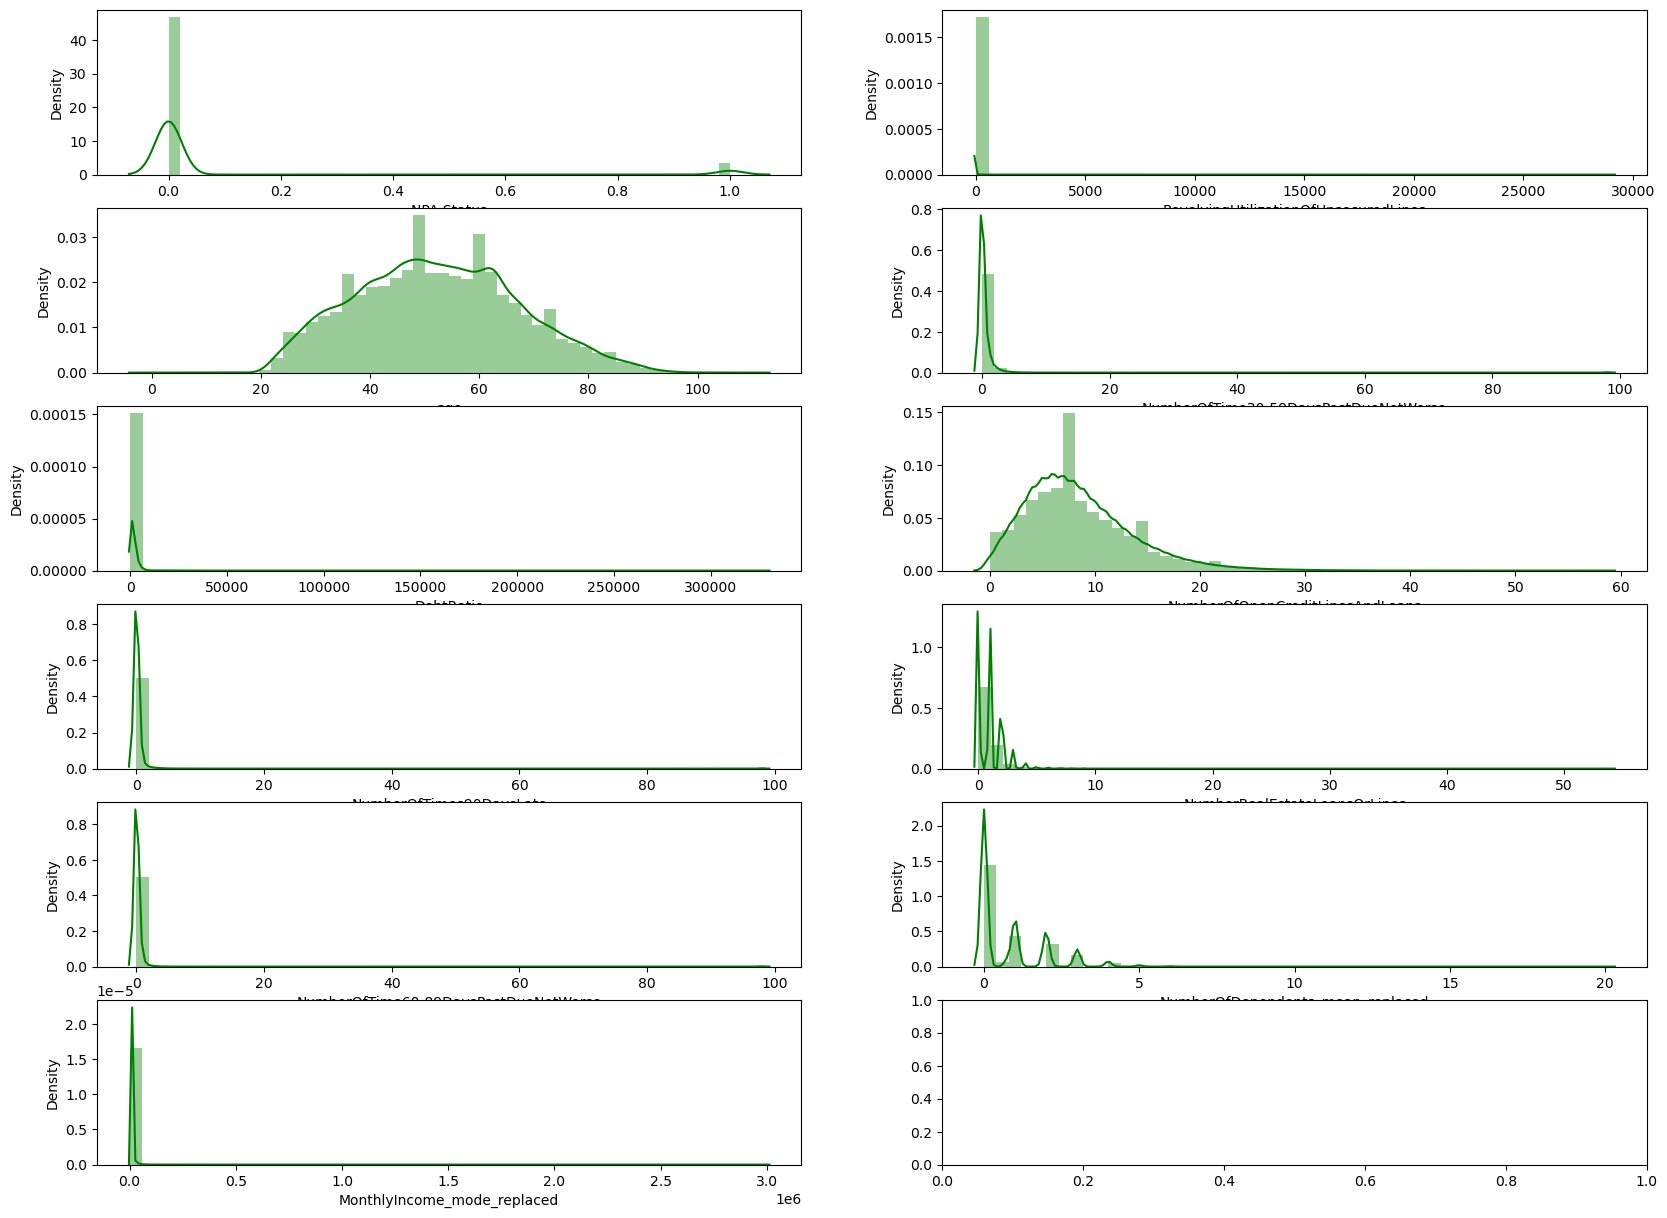

In [61]:
c = training_data_num.columns
fig , ax = plt.subplots(6 , 2 , figsize=(20,15))
for i,subplot in zip(c,ax.flatten()):
    sns.distplot(training_data_num[i],ax=subplot,color = 'g')
    

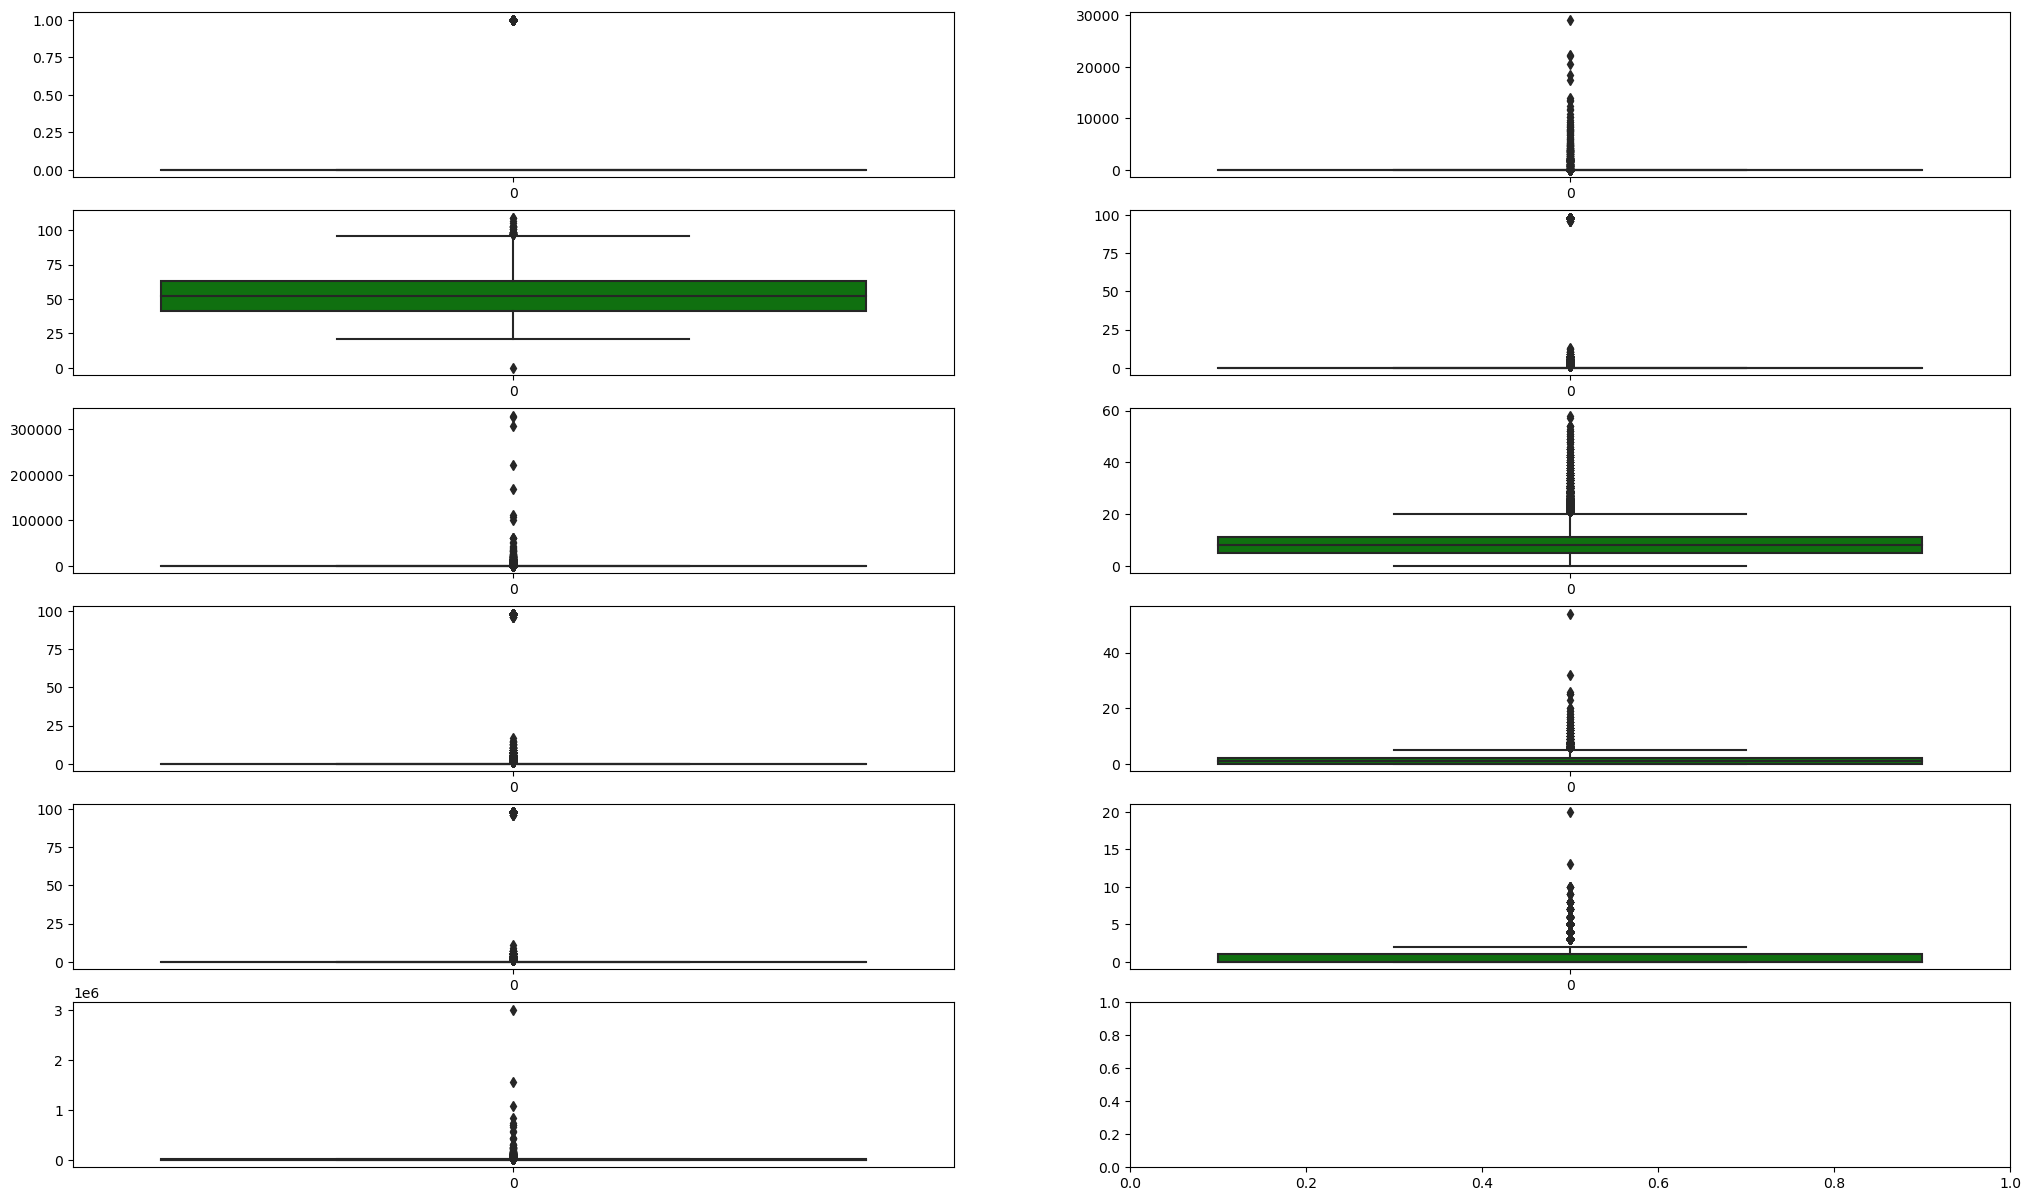

In [62]:
# checking the outliers 
c = training_data_num.columns
fig , ax = plt.subplots(6 , 2 , figsize=(25,15))
for i,subplot in zip(c,ax.flatten()):
    sns.boxplot(training_data_num[i],ax=subplot,color = 'g')
    

## Checking with variable transformation concepts whether it will change or not

<Axes: >

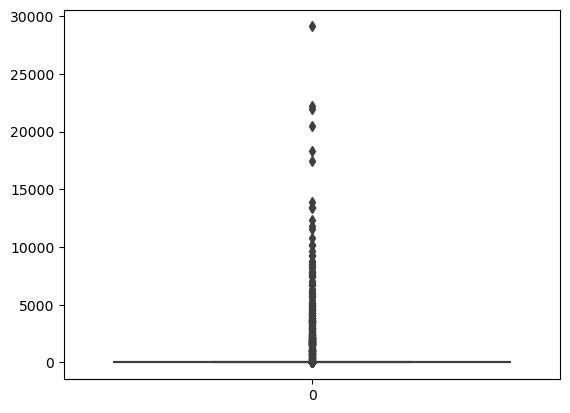

In [63]:
sns.boxplot(training_data_num['RevolvingUtilizationOfUnsecuredLines'])

In [64]:
import scipy.stats as stats

In [65]:
def plotted(training_data_num , var):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title('boxplot')
    sns.boxplot(training_data_num[var])
    plt.subplot(1,3,2)
    plt.title('hist')
    plt.hist(training_data_num[var])
    plt.subplot(1,3,3)
    plt.title('Probplot')
    stats.probplot(training_data_num[var],dist='norm',plot = plt)
    plt.show()

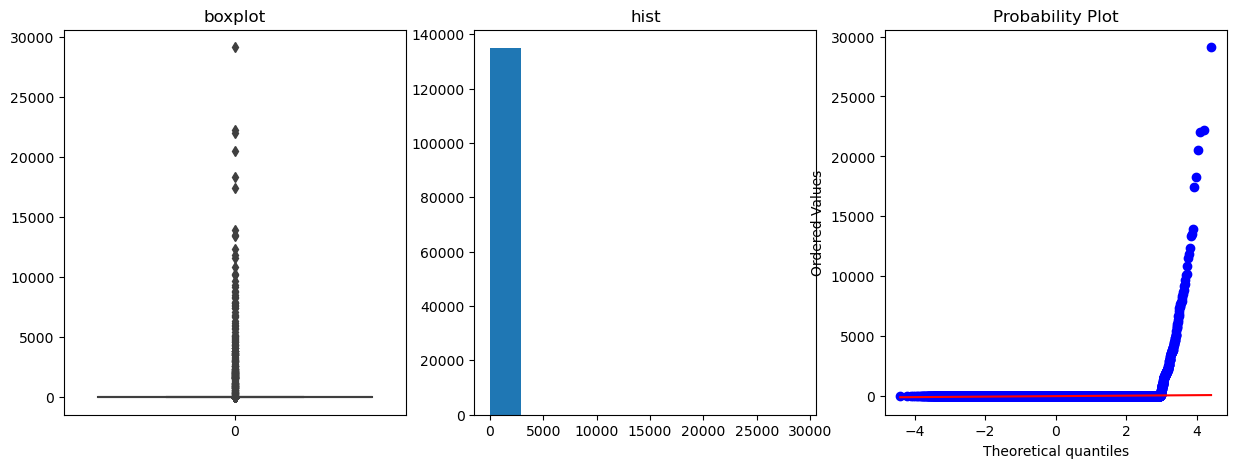

In [66]:
plotted(training_data_num,'RevolvingUtilizationOfUnsecuredLines')

In [67]:
# applying YoeJohnson algorithm for variable transformation
training_data_num['RevolvingUtilizationOfUnsecuredLines_chec'] , alpha = stats.yeojohnson(training_data_num['RevolvingUtilizationOfUnsecuredLines'])


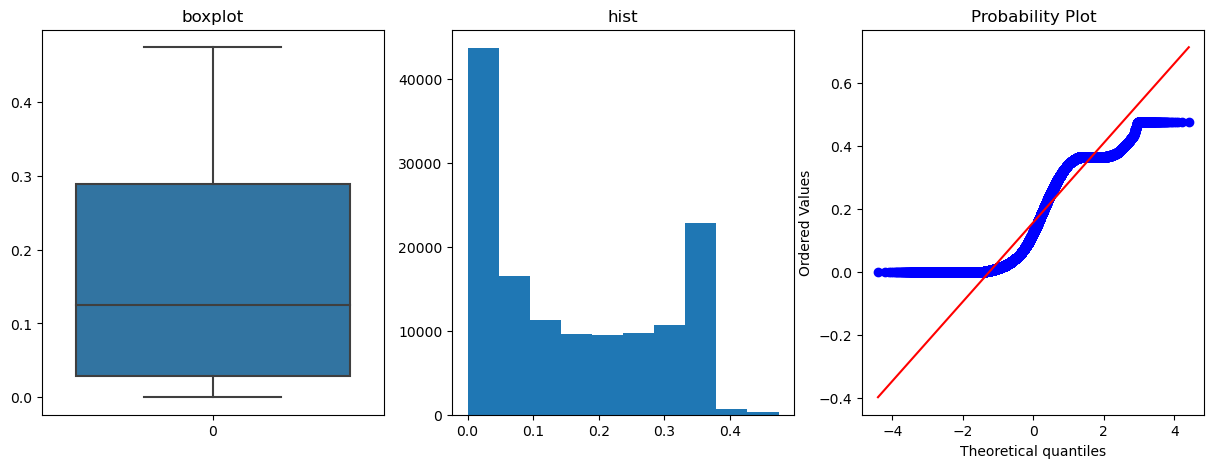

In [68]:
plotted(training_data_num,'RevolvingUtilizationOfUnsecuredLines_chec')

In [69]:
## since the variable transformation worked really well on one feature we will be applying the same on every other and dropping the existing feature

training_data_num = training_data_num.drop(['RevolvingUtilizationOfUnsecuredLines_chec'],axis = 1)
training_data_num.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents_mean_replaced', 'MonthlyIncome_mode_replaced'],
      dtype='object')

In [70]:
def fun(training_data_num , var):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title('boxplot')
    sns.boxplot(training_data_num[var+'_yoe'])
    plt.subplot(1,3,2)
    plt.title('hist')
    plt.hist(training_data_num[var+'_yoe'])
    plt.subplot(1,3,3)
    plt.title('Probplot')
    stats.probplot(training_data_num[var+'_yoe'],dist='norm',plot = plt)
    plt.show()

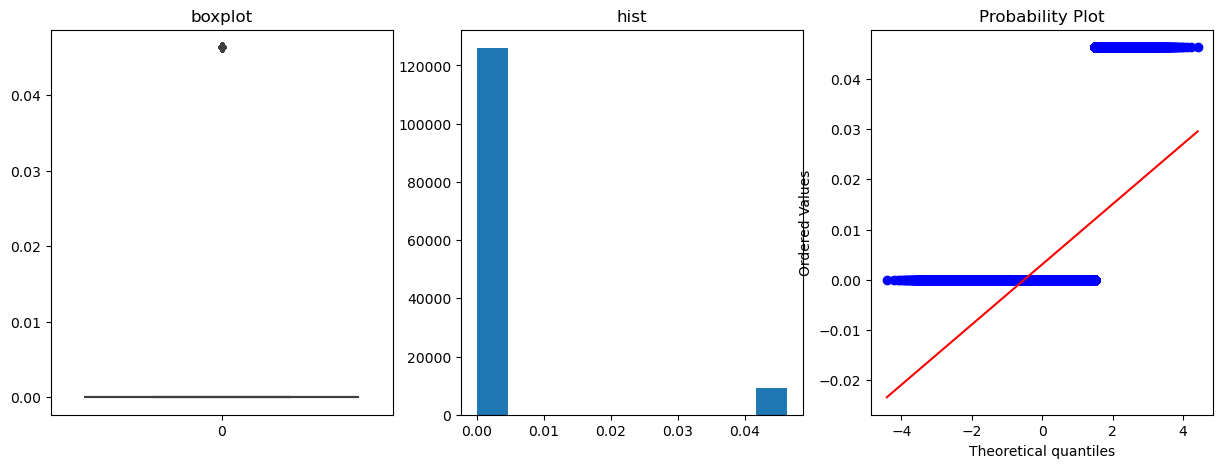

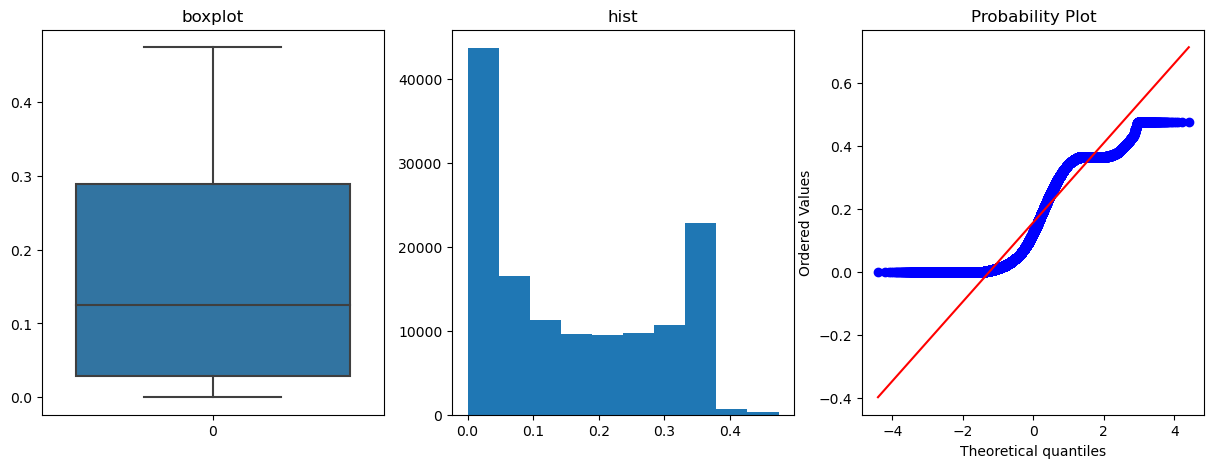

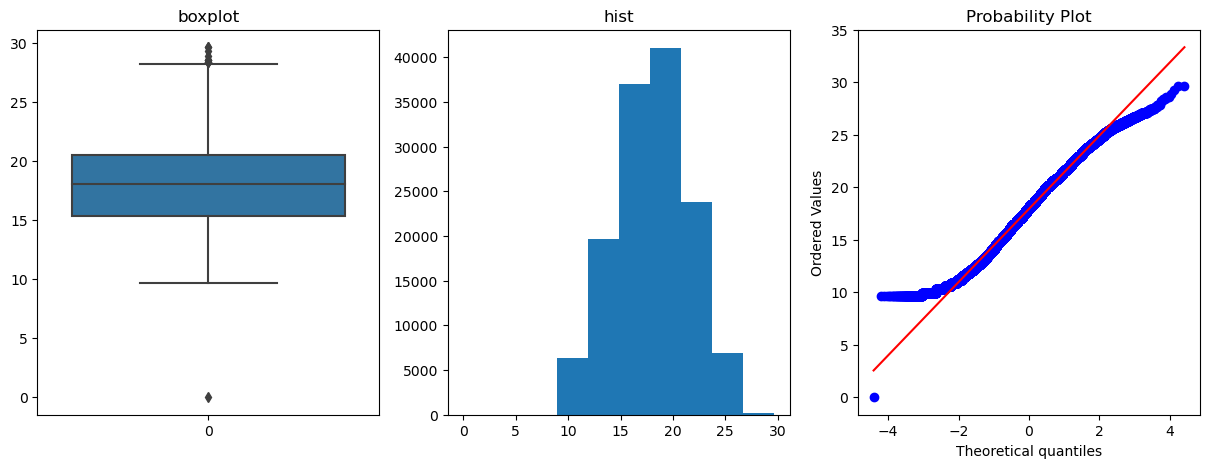

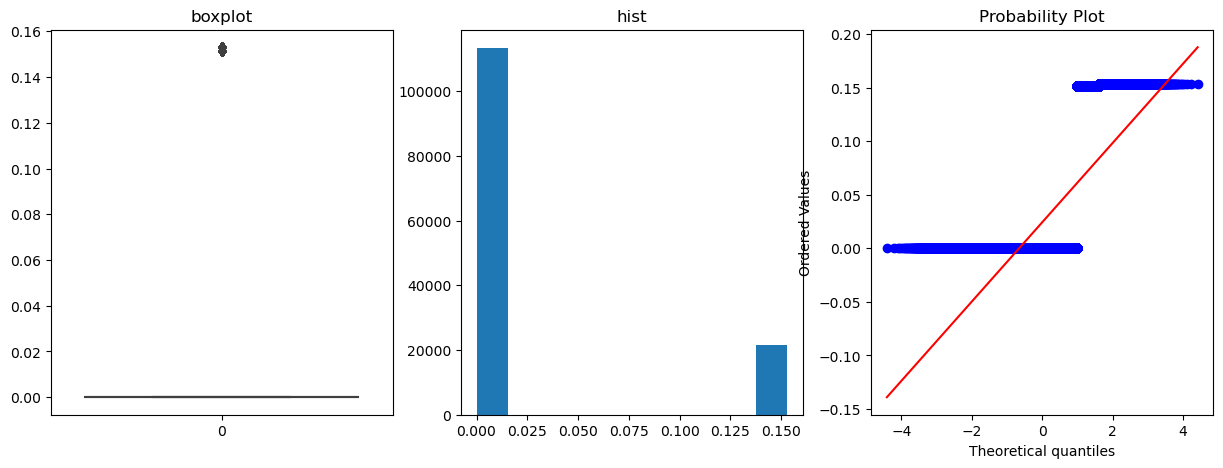

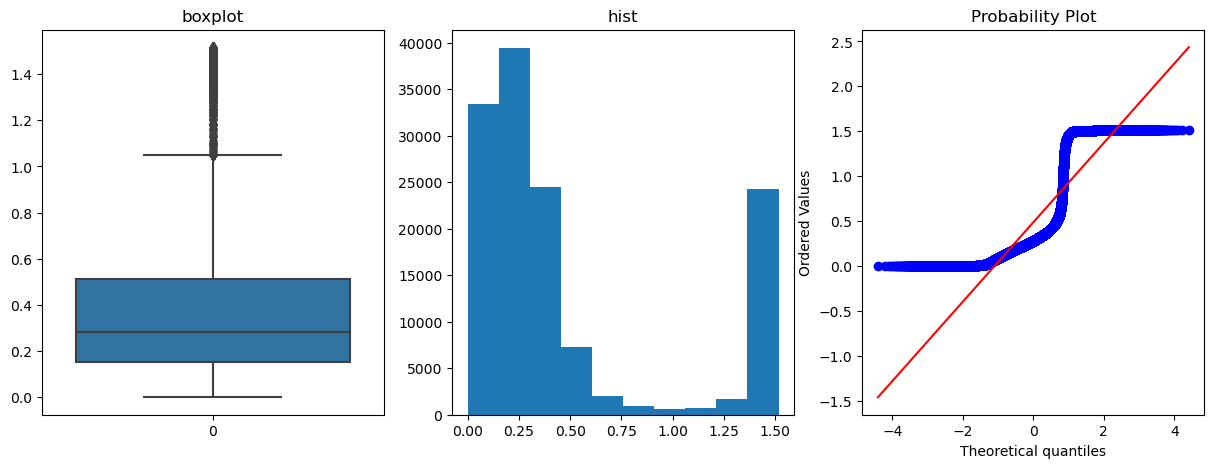

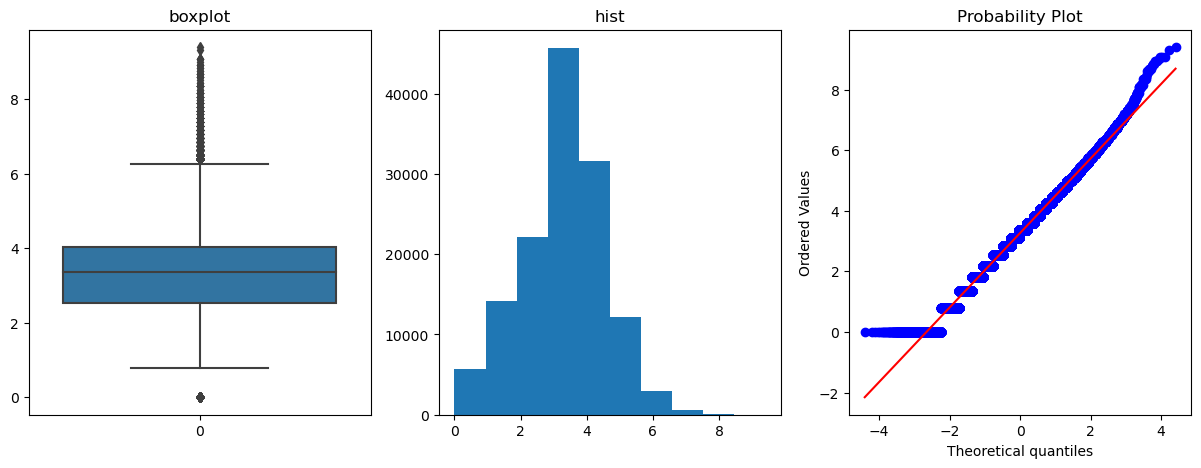

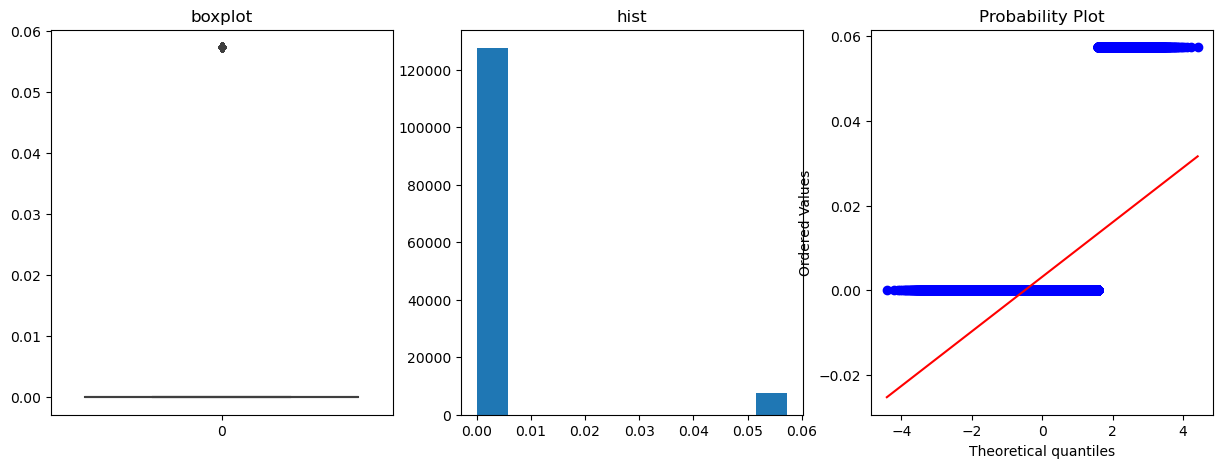

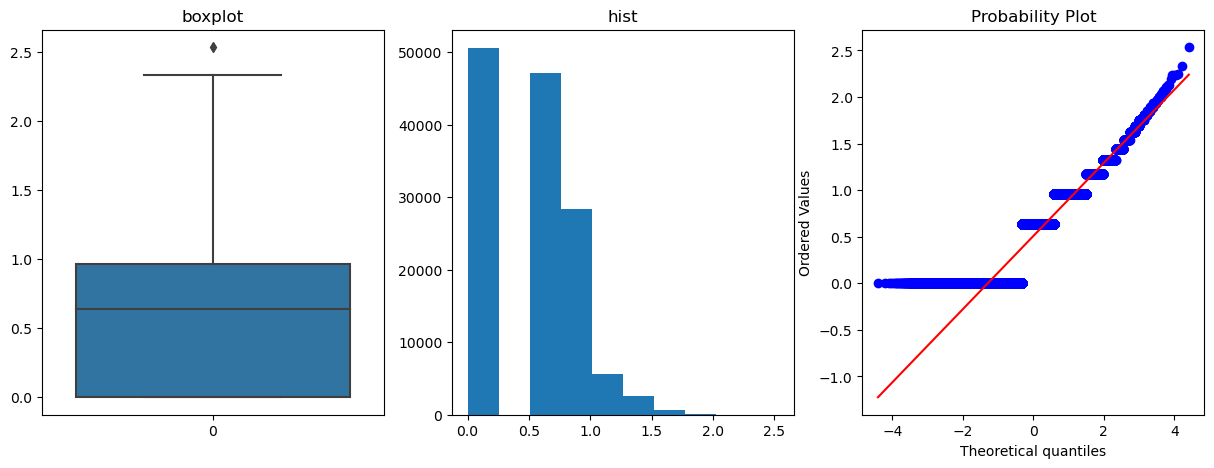

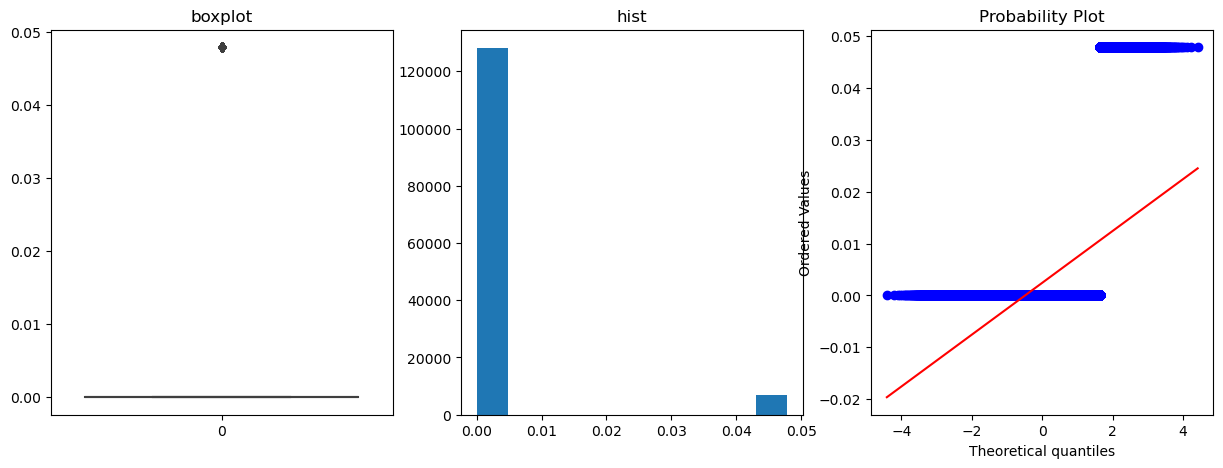

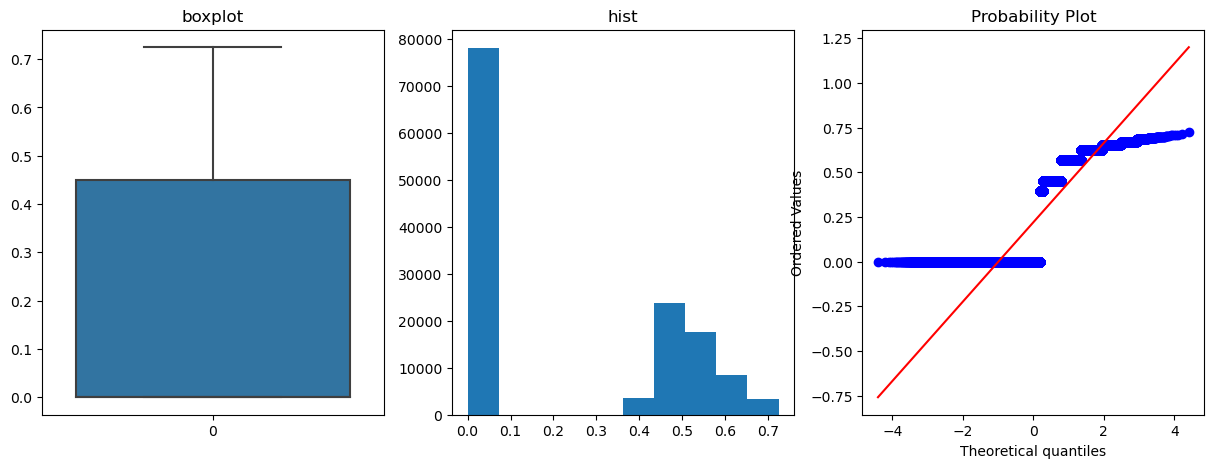

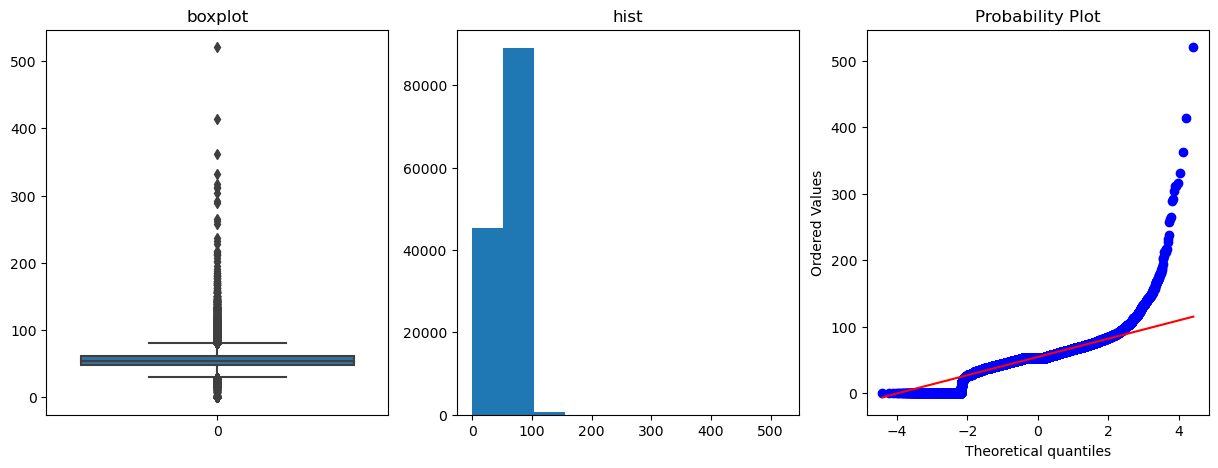

In [71]:
for i in training_data_num.columns:
    training_data_num[i+'_yoe'], alpha = stats.yeojohnson(training_data_num[i])
    fun(training_data_num , i)

In [72]:
training_data_num.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents_mean_replaced', 'MonthlyIncome_mode_replaced',
       'NPA Status_yoe', 'RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe',
       'NumberOfTime30-59DaysPastDueNotWorse_yoe', 'DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe', 'NumberOfTimes90DaysLate_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfTime60-89DaysPastDueNotWorse_yoe',
       'NumberOfDependents_mean_replaced_yoe',
       'MonthlyIncome_mode_replaced_yoe'],
      dtype='object')

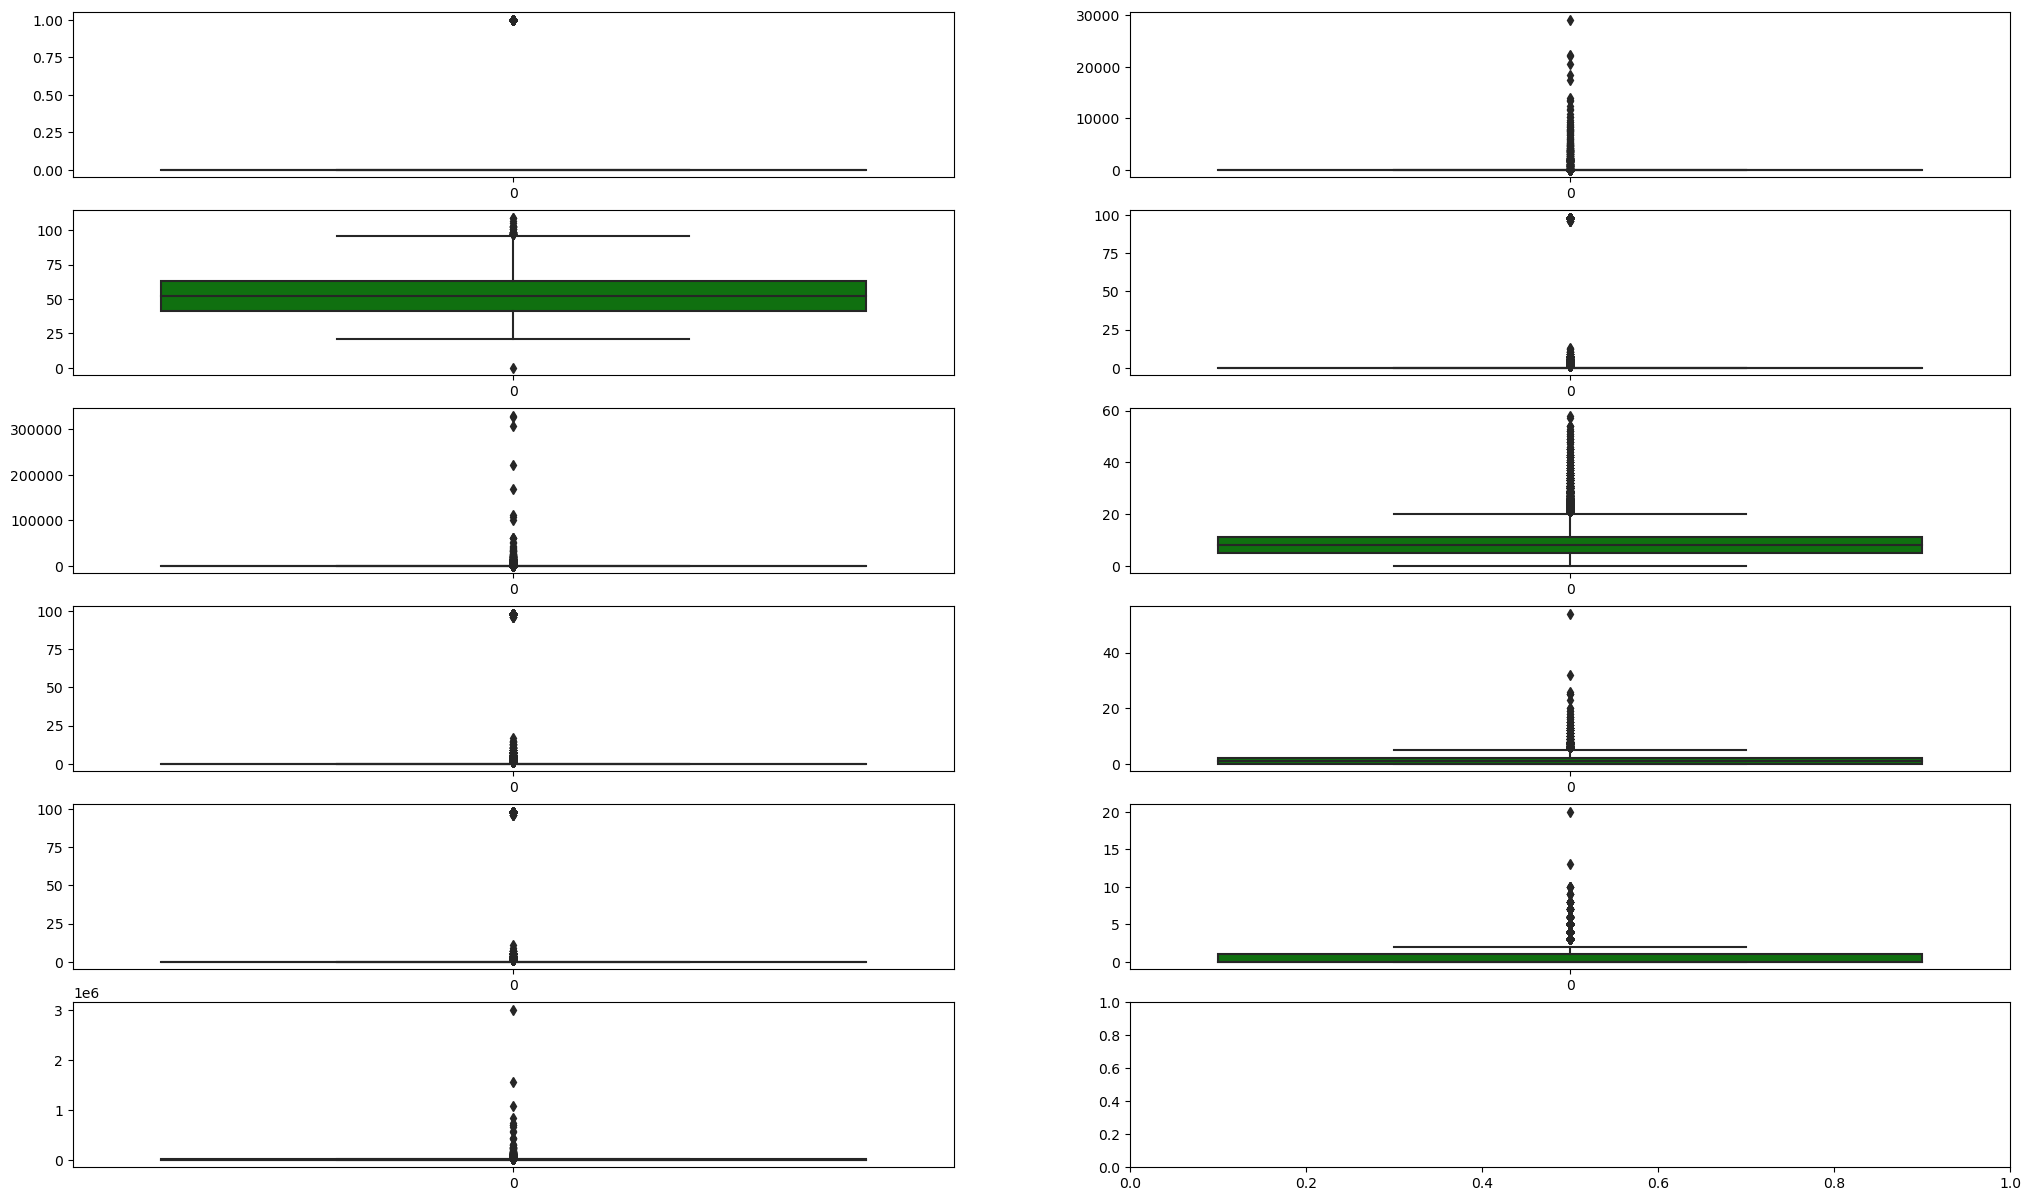

In [73]:
## subplots for og features
k = ['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents_mean_replaced', 'MonthlyIncome_mode_replaced']


fig , ax = plt.subplots(6 , 2 , figsize=(25,15))
for i,subplot in zip(k,ax.flatten()):
    sns.boxplot(training_data_num[i],ax=subplot,color = 'g')
    


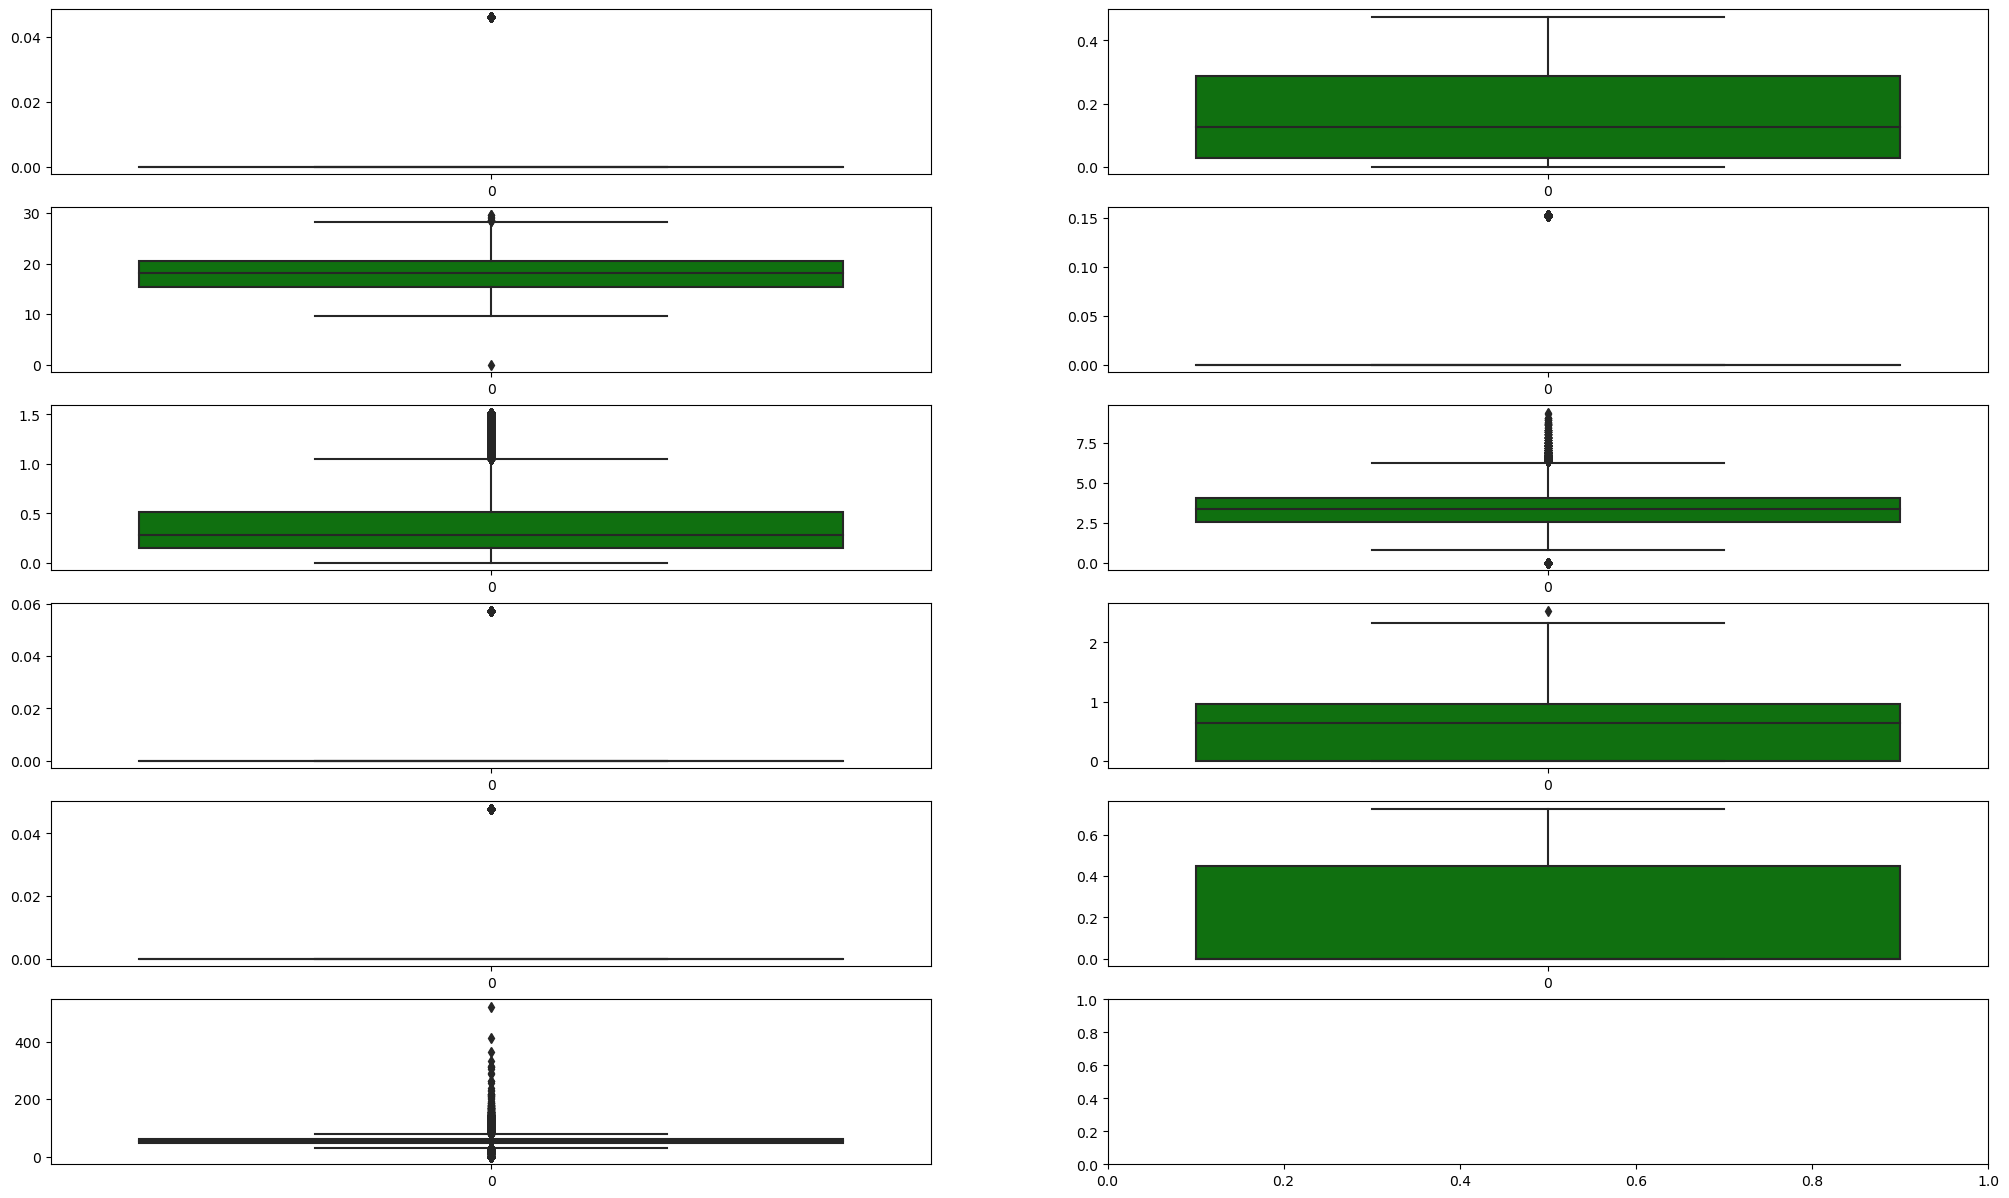

In [74]:
## subplot for variable transformed features
c = ['NPA Status_yoe', 'RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe',
       'NumberOfTime30-59DaysPastDueNotWorse_yoe', 'DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe', 'NumberOfTimes90DaysLate_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfTime60-89DaysPastDueNotWorse_yoe',
       'NumberOfDependents_mean_replaced_yoe',
       'MonthlyIncome_mode_replaced_yoe']

fig , ax = plt.subplots(6 , 2 , figsize=(25,15))
for i,subplot in zip(c,ax.flatten()):
    sns.boxplot(training_data_num[i],ax=subplot,color = 'g')
    


In [75]:
#deleting fetures with imporper values
c[0] , c[3] , c[6] , c[8]

('NPA Status_yoe',
 'NumberOfTime30-59DaysPastDueNotWorse_yoe',
 'NumberOfTimes90DaysLate_yoe',
 'NumberOfTime60-89DaysPastDueNotWorse_yoe')

In [76]:
er = ['NPA Status_yoe',
 'NumberOfTime30-59DaysPastDueNotWorse_yoe',
 'NumberOfTimes90DaysLate_yoe',
 'NumberOfTime60-89DaysPastDueNotWorse_yoe']


for i in er:
    print('The unique values in'+' '+i+' = '+str(training_data_num[i].unique()))
    print()

The unique values in NPA Status_yoe = [-0.          0.04631305]

The unique values in NumberOfTime30-59DaysPastDueNotWorse_yoe = [-0.          0.15301203  0.15137923  0.15302569  0.15302857  0.15291317
  0.15302983  0.15302964  0.15302974  0.15302937  0.15302983  0.15302979
  0.15302982  0.15302983  0.15302981  0.15302982]

The unique values in NumberOfTimes90DaysLate_yoe = [-0.          0.05734618  0.05734586  0.05734618  0.05734618  0.05734618
  0.05734618  0.05734618  0.05734618]

The unique values in NumberOfTime60-89DaysPastDueNotWorse_yoe = [-0.          0.04785768  0.0478577   0.0478577   0.0478577   0.0478577 ]



In [77]:
training_data_num_1 = training_data_num[['RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe',
       'NumberOfTime30-59DaysPastDueNotWorse_yoe', 'DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_mean_replaced_yoe',
       'MonthlyIncome_mode_replaced_yoe']]


In [78]:
training_data_num_1.head()

,RevolvingUtilizationOfUnsecuredLines_yoe,age_yoe,NumberOfTime30-59DaysPastDueNotWorse_yoe,DebtRatio_yoe,NumberOfOpenCreditLinesAndLoans_yoe,NumberRealEstateLoansOrLines_yoe,NumberOfDependents_mean_replaced_yoe,MonthlyIncome_mode_replaced_yoe
149883,0.004118,17.102734,-0.000000,0.206564,2.529692,0.961001,0.624393,65.830385
34945,0.364350,12.952401,0.153012,0.492462,1.804689,0.636561,0.653705,38.671933
120143,0.245834,19.443287,-0.000000,0.198022,3.609993,0.961001,-0.000000,83.915736
56652,0.253755,22.906850,-0.000000,0.214197,4.248286,-0.000000,0.449138,53.174213
17440,0.230134,14.048325,-0.000000,0.354409,3.370387,0.961001,0.624393,42.620070


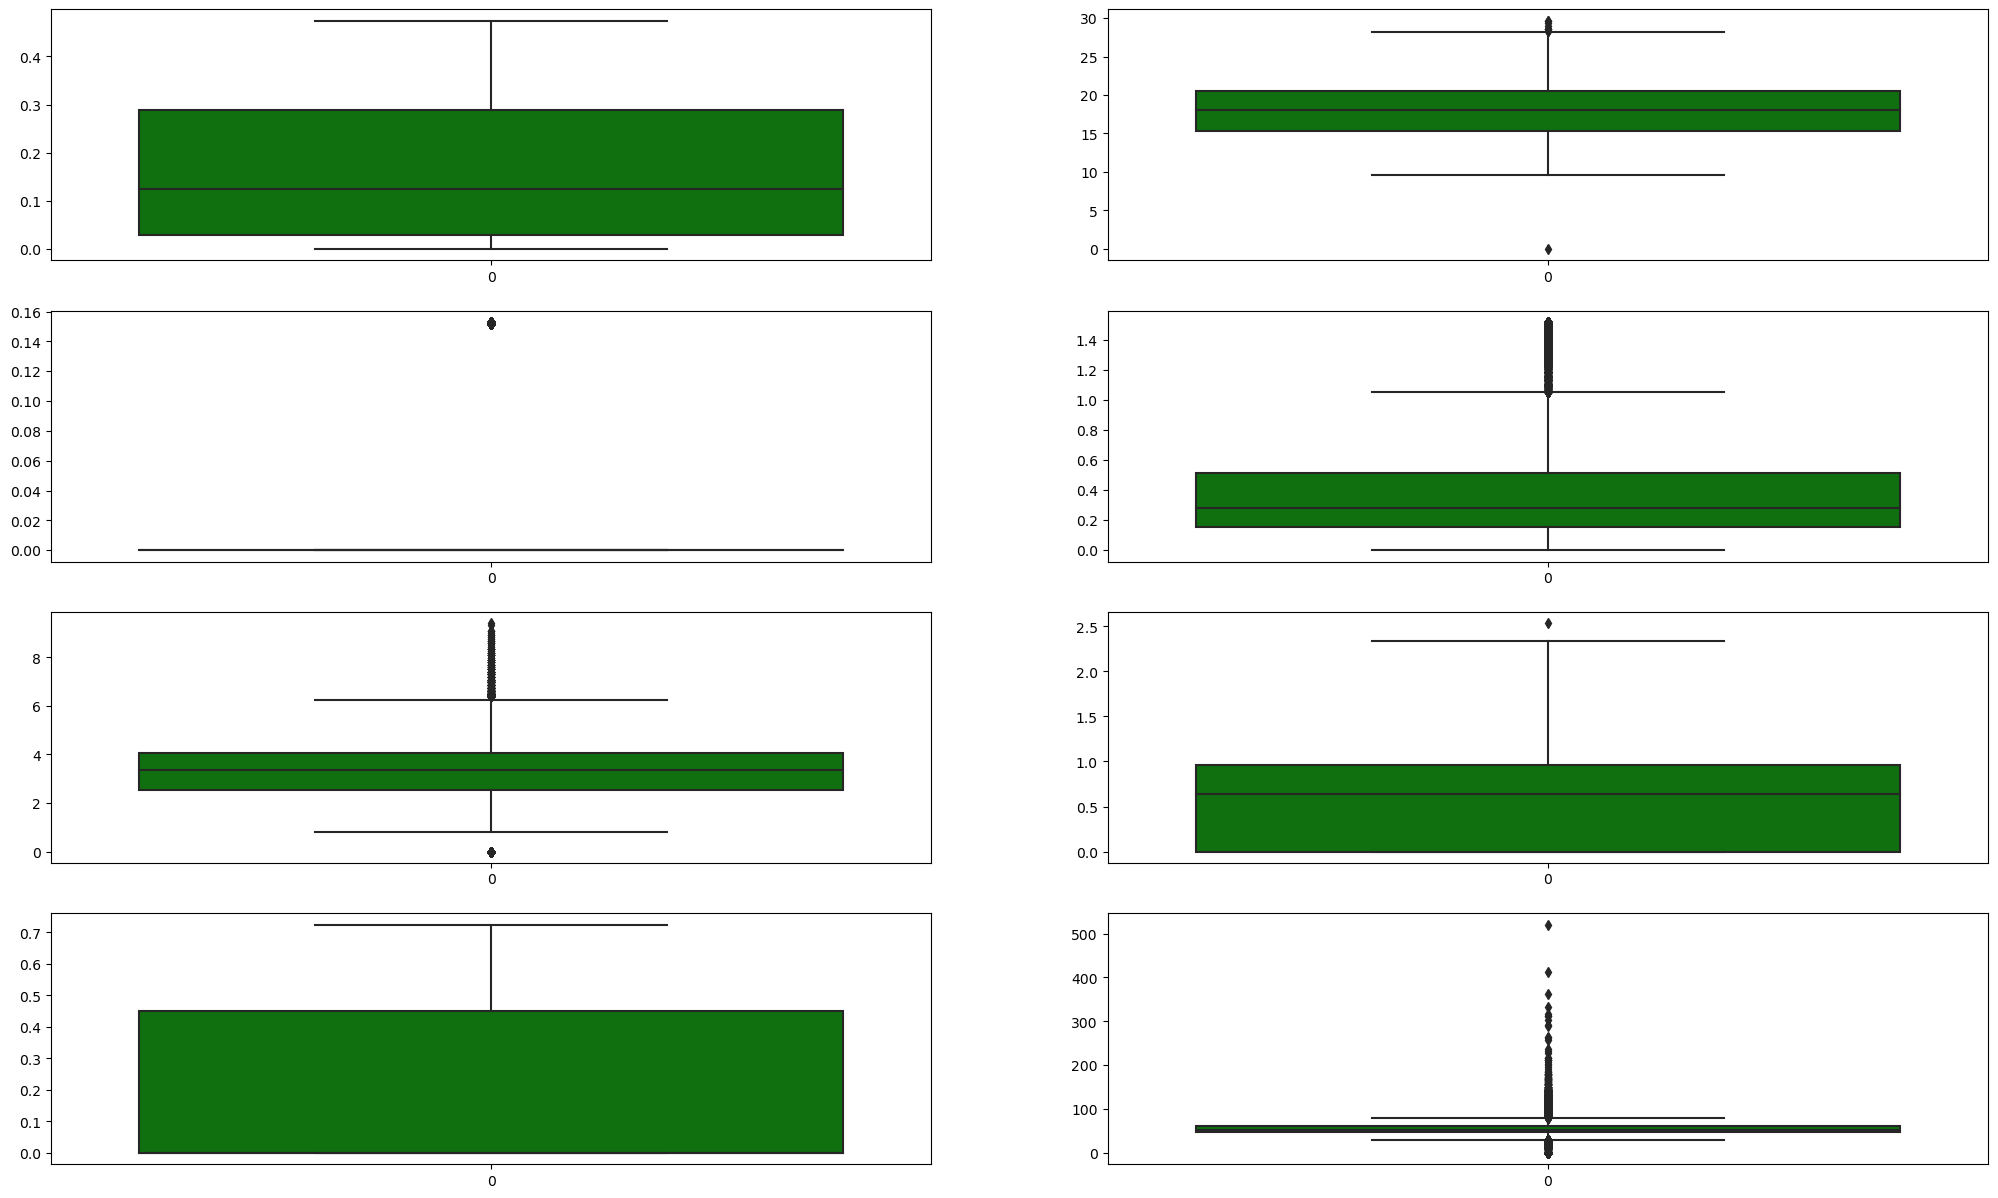

In [79]:
c = training_data_num_1.columns
fig , ax = plt.subplots(4 , 2 , figsize=(25,15))
for i,subplot in zip(c,ax.flatten()):
    sns.boxplot(training_data_num_1[i],ax=subplot,color = 'g')

In [80]:
## As we can see majority of the outliers are now gone, we still have to remove the remaining ones so we will be 
#using the Interquantile range(IQR) concept with the 5th and 95th percentile  

# let's start by checking only one column

def IQR(training_data_num_1,var):
    iqr=training_data_num_1[var].quantile(0.75)-training_data_num_1[var].quantile(0.75)
    upper_range= training_data_num_1[var].quantile(0.75)+(iqr*1.5)
    lower_range= training_data_num_1[var].quantile(0.25)-(iqr*1.5)
    return upper_range,lower_range


upper,lower = IQR(training_data_num_1 , 'MonthlyIncome_mode_replaced_yoe')

In [81]:
upper, lower

(61.3928721693439, 48.5740470435375)

In [82]:
training_data_num_1['MonthlyIncome_mode_replaced_yoe_re'] = np.where(training_data_num_1['MonthlyIncome_mode_replaced_yoe'] > upper , upper,
                                                                    np.where(training_data_num_1['MonthlyIncome_mode_replaced_yoe'] < lower , lower , training_data_num_1['MonthlyIncome_mode_replaced_yoe']))

<Axes: >

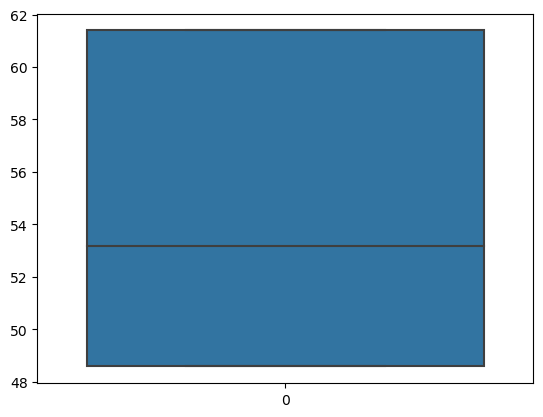

In [83]:
sns.boxplot(training_data_num_1['MonthlyIncome_mode_replaced_yoe_re'])

In [84]:
# we can see the above diagram looks good, we will be using the same method for all the other features

training_data_num_1 = training_data_num_1.drop(['MonthlyIncome_mode_replaced_yoe_re'],axis=1)

In [85]:
for i in training_data_num_1.columns:
    upper , lower = IQR(training_data_num_1 , i)
    training_data_num_1[i+'_h'] = np.where(training_data_num_1[i] > upper , upper,
                                            np.where(training_data_num_1[i] < lower , lower , training_data_num_1[i]))
    


In [86]:
training_data_num_1.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yoe', 'age_yoe',
       'NumberOfTime30-59DaysPastDueNotWorse_yoe', 'DebtRatio_yoe',
       'NumberOfOpenCreditLinesAndLoans_yoe',
       'NumberRealEstateLoansOrLines_yoe',
       'NumberOfDependents_mean_replaced_yoe',
       'MonthlyIncome_mode_replaced_yoe',
       'RevolvingUtilizationOfUnsecuredLines_yoe_h', 'age_yoe_h',
       'NumberOfTime30-59DaysPastDueNotWorse_yoe_h', 'DebtRatio_yoe_h',
       'NumberOfOpenCreditLinesAndLoans_yoe_h',
       'NumberRealEstateLoansOrLines_yoe_h',
       'NumberOfDependents_mean_replaced_yoe_h',
       'MonthlyIncome_mode_replaced_yoe_h'],
      dtype='object')

In [87]:
# rechecking the plots 
h = ['RevolvingUtilizationOfUnsecuredLines_yoe_h', 'age_yoe_h',
       'NumberOfTime30-59DaysPastDueNotWorse_yoe_h', 'DebtRatio_yoe_h',
       'NumberOfOpenCreditLinesAndLoans_yoe_h',
       'NumberRealEstateLoansOrLines_yoe_h',
       'NumberOfDependents_mean_replaced_yoe_h',
       'MonthlyIncome_mode_replaced_yoe_h']

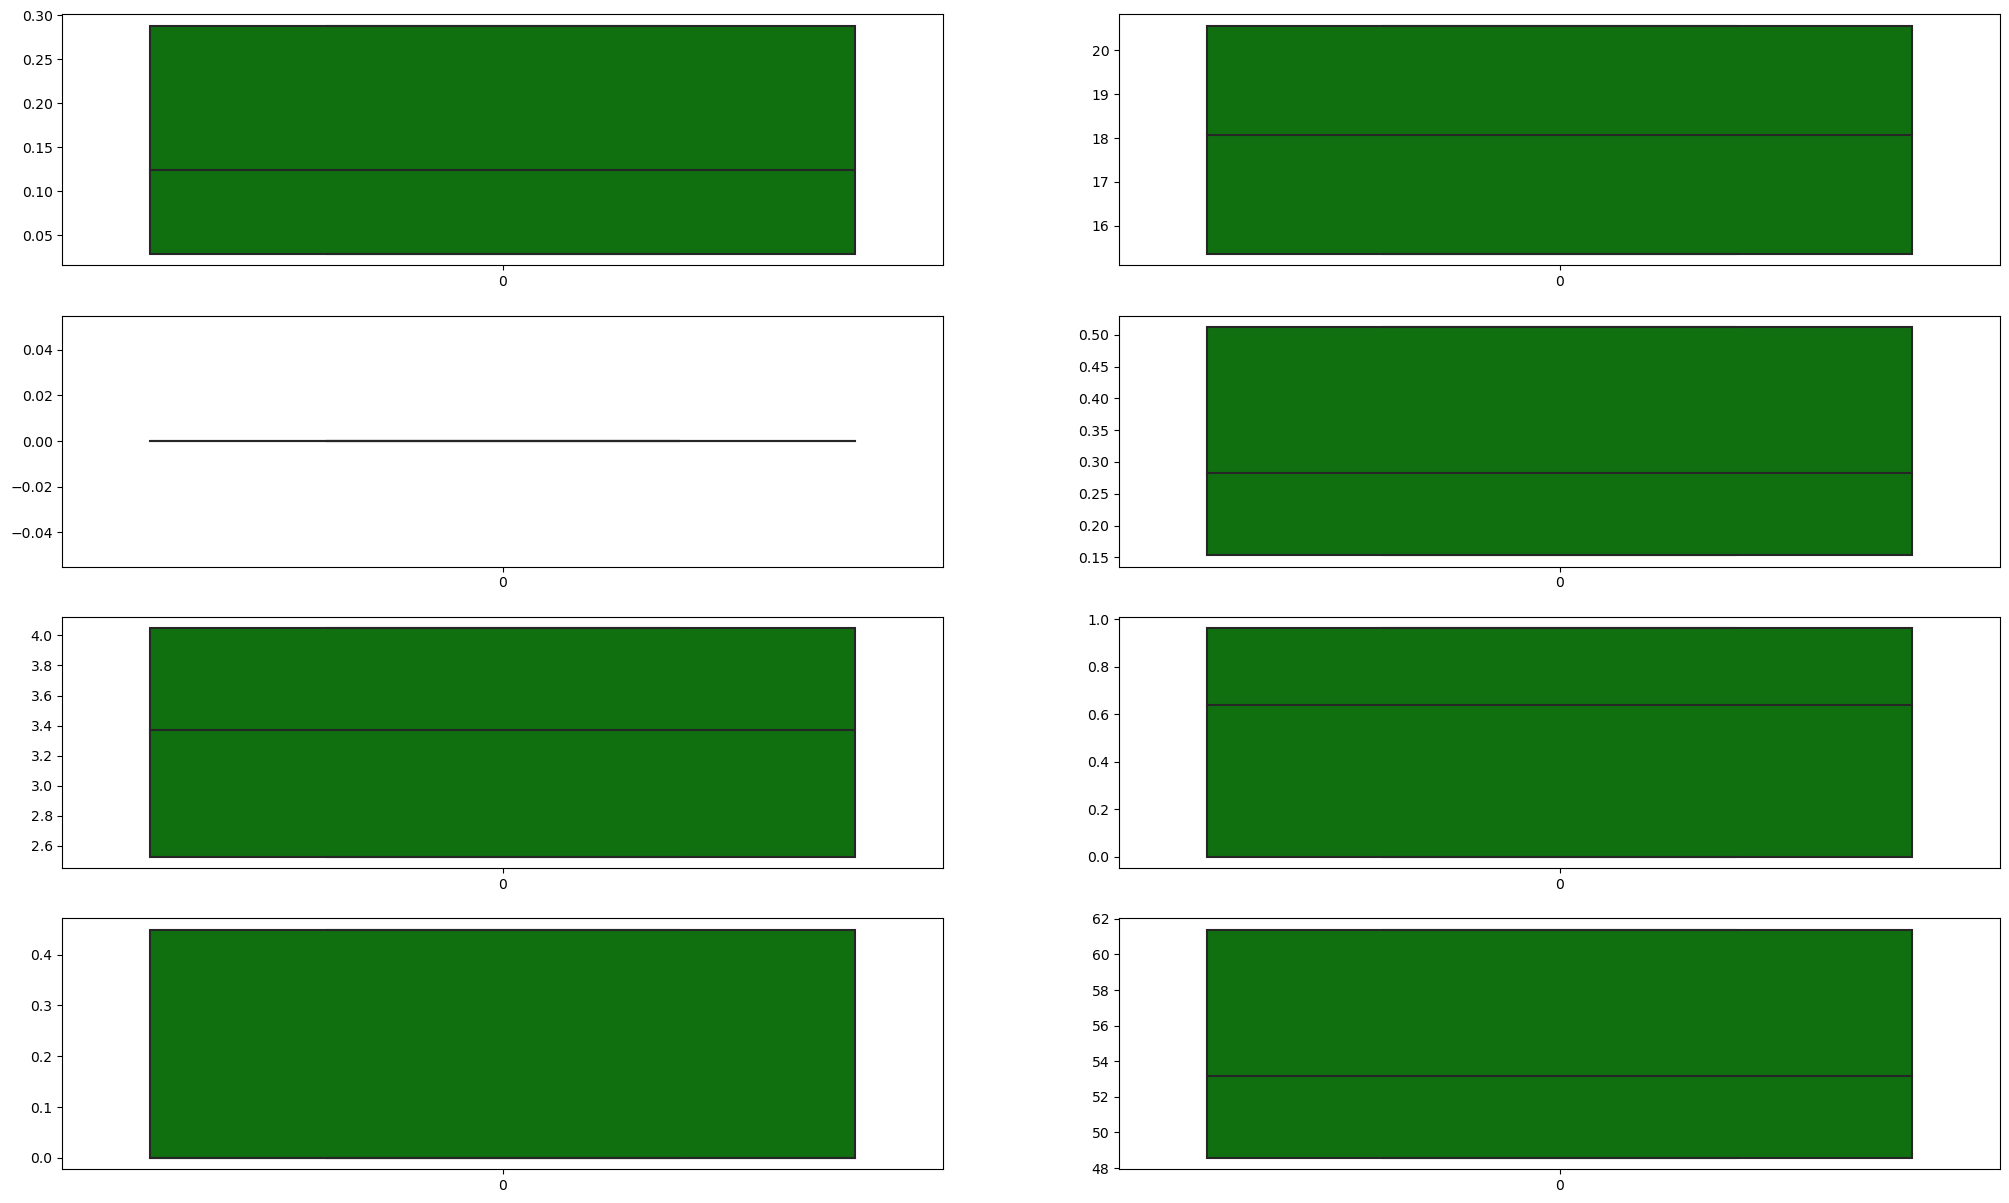

In [88]:
fig , ax = plt.subplots(4 , 2 , figsize=(25,15))
for i,subplot in zip(h,ax.flatten()):
    sns.boxplot(training_data_num_1[i],ax=subplot,color = 'g')

In [89]:
final_num_train_data = training_data_num_1[['RevolvingUtilizationOfUnsecuredLines_yoe_h', 'age_yoe_h',
       'NumberOfTime30-59DaysPastDueNotWorse_yoe_h', 'DebtRatio_yoe_h',
       'NumberOfOpenCreditLinesAndLoans_yoe_h',
       'NumberRealEstateLoansOrLines_yoe_h',
       'NumberOfDependents_mean_replaced_yoe_h',
       'MonthlyIncome_mode_replaced_yoe_h']]

### applying the same thing to test

In [90]:
testing_data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'Good_Bad', 'NumberOfDependents_mean_replaced',
       'MonthlyIncome_mode_replaced'],
      dtype='object')

In [91]:
testing_data = testing_data[['RevolvingUtilizationOfUnsecuredLines' , 'age' , 'NumberOfTime30-59DaysPastDueNotWorse',
                            'DebtRatio','NumberOfOpenCreditLinesAndLoans' , 'NumberRealEstateLoansOrLines',
                            'NumberOfDependents_mean_replaced' ,'MonthlyIncome_mode_replaced']]

In [92]:
for i in testing_data.columns:
    testing_data[i], alpha = stats.yeojohnson(testing_data[i])

In [93]:
testing_data.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents_mean_replaced', 'MonthlyIncome_mode_replaced'],
      dtype='object')

In [94]:
for i in testing_data.columns:
    upper , lower = IQR(testing_data , i)
    testing_data[i] = np.where(testing_data[i] > upper , upper,
                                            np.where(testing_data[i] < lower , lower , testing_data[i]))
    


In [95]:
testing_data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents_mean_replaced,MonthlyIncome_mode_replaced
77511,0.027628,19.875542,-0.0,0.514147,4.038746,0.955476,-0.00000,48.352314
17422,0.027628,17.438987,-0.0,0.151230,2.526089,0.634207,0.44436,55.457708
111815,0.285675,15.050855,-0.0,0.151230,2.830316,-0.000000,-0.00000,50.409170
34211,0.285675,19.875542,-0.0,0.174744,3.603207,0.955476,0.44436,55.457708
36739,0.285675,15.298547,-0.0,0.243735,4.038746,-0.000000,-0.00000,49.028272


In [96]:
testing_data.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents_mean_replaced', 'MonthlyIncome_mode_replaced'],
      dtype='object')

### since we have now removed all the outliers from the data now let's start working on the categorical data


In [97]:
training_data_cat = training_data.select_dtypes(include='object')

In [98]:
training_data_cat.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,Good_Bad
149883,Male,North,Rented,Officer2,Professional,Good
34945,Male,West,Ownhouse,Self_Emp,Matric,Bad
120143,Male,West,Ownhouse,Self_Emp,Graduate,Good
56652,Male,East,Rented,Non-officer,Professional,Good
17440,Male,North,Ownhouse,Self_Emp,Post-Grad,Good


In [99]:
for i in training_data_cat:
    print('Feature ',i,'= ',training_data_cat[i].unique())

Feature  Gender =  ['Male' 'Female']
Feature  Region =  ['North' 'West' 'East' 'South' 'Central']
Feature  Rented_OwnHouse =  ['Rented' 'Ownhouse']
Feature  Occupation =  ['Officer2' 'Self_Emp' 'Non-officer' 'Officer1' 'Officer3']
Feature  Education =  ['Professional' 'Matric' 'Graduate' 'Post-Grad' 'PhD']
Feature  Good_Bad =  ['Good' 'Bad']


## converting categorical to numerical data
### Gender, Region, Rented_Ownhouse will be converted using one hot encoding
### Education and Occupation will be converted using odinal encoding
### Good_Bad will be converted using Label encoding


In [100]:
from sklearn.preprocessing import OneHotEncoder

s = OneHotEncoder(categories='auto',drop='first')
q = s.fit_transform(training_data_cat[['Gender','Region','Rented_OwnHouse']])
q = q.toarray()
q = pd.DataFrame(q,index=training_data_cat.index)
q.columns = s.get_feature_names_out()


In [101]:
training_data_cat = pd.concat([training_data_cat,q],axis = 1)
training_data_cat = training_data_cat.drop(['Gender','Region','Rented_OwnHouse'],axis = 1)
training_data_cat.head()

,Occupation,Education,Good_Bad,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented
149883,Officer2,Professional,Good,1.0,0.0,1.0,0.0,0.0,1.0
34945,Self_Emp,Matric,Bad,1.0,0.0,0.0,0.0,1.0,0.0
120143,Self_Emp,Graduate,Good,1.0,0.0,0.0,0.0,1.0,0.0
56652,Non-officer,Professional,Good,1.0,1.0,0.0,0.0,0.0,1.0
17440,Self_Emp,Post-Grad,Good,1.0,0.0,1.0,0.0,0.0,0.0


In [102]:
from sklearn.preprocessing import OrdinalEncoder
p = OrdinalEncoder()
q1 = p.fit_transform(training_data_cat[['Occupation','Education']])
#q1 = q1.toarray()
q1 = pd.DataFrame(q1,index=training_data_cat.index)
q1.columns = ['Occupation_re','Education_re']
training_data_cat = pd.concat([training_data_cat,q1],axis = 1)
training_data_cat = training_data_cat.drop(['Occupation','Education'],axis = 1)
training_data_cat.head()
## applying Ordinal data to Occupation and Education


,Good_Bad,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented,Occupation_re,Education_re
149883,Good,1.0,0.0,1.0,0.0,0.0,1.0,2.0,4.0
34945,Bad,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0
120143,Good,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0
56652,Good,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
17440,Good,1.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0


In [103]:
# labelencoding to convert dependent variable

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l1 = l.fit_transform(training_data_cat['Good_Bad'])
#q1 = q1.toarray()
l1 = pd.DataFrame(l1,index=training_data_cat.index)
l1.columns = ['Good_Bad_re']
training_data_cat = pd.concat([training_data_cat,l1],axis = 1)
training_data_cat = training_data_cat.drop(['Good_Bad'],axis = 1)
training_data_cat.head()

,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented,Occupation_re,Education_re,Good_Bad_re
149883,1.0,0.0,1.0,0.0,0.0,1.0,2.0,4.0,1
34945,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,0
120143,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1
56652,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1
17440,1.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0,1


### Now same technique Applying for test data "

In [104]:
testing_data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents_mean_replaced,MonthlyIncome_mode_replaced
77511,0.027628,19.875542,-0.0,0.514147,4.038746,0.955476,-0.00000,48.352314
17422,0.027628,17.438987,-0.0,0.151230,2.526089,0.634207,0.44436,55.457708
111815,0.285675,15.050855,-0.0,0.151230,2.830316,-0.000000,-0.00000,50.409170
34211,0.285675,19.875542,-0.0,0.174744,3.603207,0.955476,0.44436,55.457708
36739,0.285675,15.298547,-0.0,0.243735,4.038746,-0.000000,-0.00000,49.028272


In [105]:
test_data_cat = X_test.select_dtypes(include='object')
test_data_cat = test_data_cat.drop(['NumberOfDependents'],axis = 1)
test_data_cat.head()  # test categorical data 

,Gender,Region,Rented_OwnHouse,Occupation,Education
77511,Female,Central,Ownhouse,Officer2,Professional
17422,Male,North,Ownhouse,Self_Emp,Post-Grad
111815,Female,South,Ownhouse,Self_Emp,Matric
34211,Female,North,Ownhouse,Self_Emp,PhD
36739,Male,North,Ownhouse,Self_Emp,Matric


In [106]:
# gender,region ,Rented_ownhouse onnehot 
#Occ , Edu , Odinal 
# y_test -> label endoding 

t1 = s.transform(test_data_cat[['Gender','Region','Rented_OwnHouse']])
t1 = t1.toarray()
t1 = pd.DataFrame(t1 , index=test_data_cat.index)
t1.columns = s.get_feature_names_out()
test_data_cat = pd.concat([test_data_cat , t1],axis = 1)
test_data_cat = test_data_cat.drop(['Gender','Region','Rented_OwnHouse'],axis = 1)
test_data_cat.head()

,Occupation,Education,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented
77511,Officer2,Professional,0.0,0.0,0.0,0.0,0.0,0.0
17422,Self_Emp,Post-Grad,1.0,0.0,1.0,0.0,0.0,0.0
111815,Self_Emp,Matric,0.0,0.0,0.0,1.0,0.0,0.0
34211,Self_Emp,PhD,0.0,0.0,1.0,0.0,0.0,0.0
36739,Self_Emp,Matric,1.0,0.0,1.0,0.0,0.0,0.0


In [107]:
## Odinal encoding for test features 

t2 = p.transform(test_data_cat[['Occupation','Education']])
#t1 = t1.toarray()
t2 = pd.DataFrame(t2 , index=test_data_cat.index)
t2.columns = ['Occupation_re','Education_re']
test_data_cat = pd.concat([test_data_cat , t2],axis = 1)
test_data_cat = test_data_cat.drop(['Occupation','Education'],axis = 1)
test_data_cat.head()

,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented,Occupation_re,Education_re
77511,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
17422,1.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0
111815,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0
34211,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0
36739,1.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0


In [108]:
# converting y-test and adding into single test data 

l2 = l.transform(Y_test)
l2 = pd.DataFrame(l2 , index=test_data_cat.index)
l2.columns = ['y_test']
test_data_cat = pd.concat([test_data_cat,l2],axis = 1)


In [109]:
test_data_cat.head()

,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented,Occupation_re,Education_re,y_test
77511,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1
17422,1.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0,1
111815,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
34211,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,1
36739,1.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1


### final test data is now ready in one single variable

In [110]:
testing_data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents_mean_replaced,MonthlyIncome_mode_replaced
77511,0.027628,19.875542,-0.0,0.514147,4.038746,0.955476,-0.00000,48.352314
17422,0.027628,17.438987,-0.0,0.151230,2.526089,0.634207,0.44436,55.457708
111815,0.285675,15.050855,-0.0,0.151230,2.830316,-0.000000,-0.00000,50.409170
34211,0.285675,19.875542,-0.0,0.174744,3.603207,0.955476,0.44436,55.457708
36739,0.285675,15.298547,-0.0,0.243735,4.038746,-0.000000,-0.00000,49.028272


In [111]:
final_test_data = pd.concat([testing_data , test_data_cat],axis = 1)
final_test_data.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents_mean_replaced,MonthlyIncome_mode_replaced,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented,Occupation_re,Education_re,y_test
77511,0.027628,19.875542,-0.0,0.514147,4.038746,0.955476,-0.00000,48.352314,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1
17422,0.027628,17.438987,-0.0,0.151230,2.526089,0.634207,0.44436,55.457708,1.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0,1
111815,0.285675,15.050855,-0.0,0.151230,2.830316,-0.000000,-0.00000,50.409170,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1
34211,0.285675,19.875542,-0.0,0.174744,3.603207,0.955476,0.44436,55.457708,0.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,1
36739,0.285675,15.298547,-0.0,0.243735,4.038746,-0.000000,-0.00000,49.028272,1.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1


In [112]:
final_test_data.shape

(15001, 17)

## making training also into one perfect variable


In [113]:
final_num_train_data.head()

,RevolvingUtilizationOfUnsecuredLines_yoe_h,age_yoe_h,NumberOfTime30-59DaysPastDueNotWorse_yoe_h,DebtRatio_yoe_h,NumberOfOpenCreditLinesAndLoans_yoe_h,NumberRealEstateLoansOrLines_yoe_h,NumberOfDependents_mean_replaced_yoe_h,MonthlyIncome_mode_replaced_yoe_h
149883,0.028655,17.102734,-0.0,0.206564,2.529692,0.961001,0.449138,61.392872
34945,0.288394,15.359271,0.0,0.492462,2.529692,0.636561,0.449138,48.574047
120143,0.245834,19.443287,-0.0,0.198022,3.609993,0.961001,-0.000000,61.392872
56652,0.253755,20.558779,-0.0,0.214197,4.047033,-0.000000,0.449138,53.174213
17440,0.230134,15.359271,-0.0,0.354409,3.370387,0.961001,0.449138,48.574047


In [114]:
final_train_data = pd.concat([final_num_train_data , training_data_cat],axis = 1)
final_train_data.head()

,RevolvingUtilizationOfUnsecuredLines_yoe_h,age_yoe_h,NumberOfTime30-59DaysPastDueNotWorse_yoe_h,DebtRatio_yoe_h,NumberOfOpenCreditLinesAndLoans_yoe_h,NumberRealEstateLoansOrLines_yoe_h,NumberOfDependents_mean_replaced_yoe_h,MonthlyIncome_mode_replaced_yoe_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented,Occupation_re,Education_re,Good_Bad_re
149883,0.028655,17.102734,-0.0,0.206564,2.529692,0.961001,0.449138,61.392872,1.0,0.0,1.0,0.0,0.0,1.0,2.0,4.0,1
34945,0.288394,15.359271,0.0,0.492462,2.529692,0.636561,0.449138,48.574047,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,0
120143,0.245834,19.443287,-0.0,0.198022,3.609993,0.961001,-0.000000,61.392872,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1
56652,0.253755,20.558779,-0.0,0.214197,4.047033,-0.000000,0.449138,53.174213,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1
17440,0.230134,15.359271,-0.0,0.354409,3.370387,0.961001,0.449138,48.574047,1.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0,1


In [115]:
df['Good_Bad'][149883]

'Good'

In [116]:
final_train_data.rename(columns={'Good_Bad_re':'y_train'},inplace=True)

In [117]:
final_train_data.head()

,RevolvingUtilizationOfUnsecuredLines_yoe_h,age_yoe_h,NumberOfTime30-59DaysPastDueNotWorse_yoe_h,DebtRatio_yoe_h,NumberOfOpenCreditLinesAndLoans_yoe_h,NumberRealEstateLoansOrLines_yoe_h,NumberOfDependents_mean_replaced_yoe_h,MonthlyIncome_mode_replaced_yoe_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented,Occupation_re,Education_re,y_train
149883,0.028655,17.102734,-0.0,0.206564,2.529692,0.961001,0.449138,61.392872,1.0,0.0,1.0,0.0,0.0,1.0,2.0,4.0,1
34945,0.288394,15.359271,0.0,0.492462,2.529692,0.636561,0.449138,48.574047,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,0
120143,0.245834,19.443287,-0.0,0.198022,3.609993,0.961001,-0.000000,61.392872,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1
56652,0.253755,20.558779,-0.0,0.214197,4.047033,-0.000000,0.449138,53.174213,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1
17440,0.230134,15.359271,-0.0,0.354409,3.370387,0.961001,0.449138,48.574047,1.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0,1


### scaling down the features value so that we get proper GPU utilisation

In [118]:
## scaling down using Z-score = xi - mean/std

X_train = final_train_data.iloc[: , :-1]
y_train = final_train_data.iloc[: , -1]

X_test = final_test_data.iloc[: , :-1]
y_test = final_test_data.iloc[: , -1]

In [119]:
y_train.shape

(134999,)

In [120]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines_yoe_h,age_yoe_h,NumberOfTime30-59DaysPastDueNotWorse_yoe_h,DebtRatio_yoe_h,NumberOfOpenCreditLinesAndLoans_yoe_h,NumberRealEstateLoansOrLines_yoe_h,NumberOfDependents_mean_replaced_yoe_h,MonthlyIncome_mode_replaced_yoe_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented,Occupation_re,Education_re
149883,0.028655,17.102734,-0.0,0.206564,2.529692,0.961001,0.449138,61.392872,1.0,0.0,1.0,0.0,0.0,1.0,2.0,4.0
34945,0.288394,15.359271,0.0,0.492462,2.529692,0.636561,0.449138,48.574047,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0
120143,0.245834,19.443287,-0.0,0.198022,3.609993,0.961001,-0.000000,61.392872,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0
56652,0.253755,20.558779,-0.0,0.214197,4.047033,-0.000000,0.449138,53.174213,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
17440,0.230134,15.359271,-0.0,0.354409,3.370387,0.961001,0.449138,48.574047,1.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0


In [121]:
for i in X_test.columns:
    X_test[i+'_yoe_h'] = X_test[i]

In [122]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yoe_h', 'age_yoe_h',
       'NumberOfTime30-59DaysPastDueNotWorse_yoe_h', 'DebtRatio_yoe_h',
       'NumberOfOpenCreditLinesAndLoans_yoe_h',
       'NumberRealEstateLoansOrLines_yoe_h',
       'NumberOfDependents_mean_replaced_yoe_h',
       'MonthlyIncome_mode_replaced_yoe_h', 'Gender_Male', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Rented_OwnHouse_Rented',
       'Occupation_re', 'Education_re'],
      dtype='object')

In [123]:
X_test.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents_mean_replaced', 'MonthlyIncome_mode_replaced',
       'Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_OwnHouse_Rented', 'Occupation_re',
       'Education_re', 'RevolvingUtilizationOfUnsecuredLines_yoe_h',
       'age_yoe_h', 'NumberOfTime30-59DaysPastDueNotWorse_yoe_h',
       'DebtRatio_yoe_h', 'NumberOfOpenCreditLinesAndLoans_yoe_h',
       'NumberRealEstateLoansOrLines_yoe_h',
       'NumberOfDependents_mean_replaced_yoe_h',
       'MonthlyIncome_mode_replaced_yoe_h', 'Gender_Male_yoe_h',
       'Region_East_yoe_h', 'Region_North_yoe_h', 'Region_South_yoe_h',
       'Region_West_yoe_h', 'Rented_OwnHouse_Rented_yoe_h',
       'Occupation_re_yoe_h', 'Education_re_yoe_h'],
      dtype='object')

In [124]:
X_test = X_test.drop(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents_mean_replaced', 'MonthlyIncome_mode_replaced','Gender_Male_yoe_h',
       'Region_East_yoe_h', 'Region_North_yoe_h', 'Region_South_yoe_h',
       'Region_West_yoe_h', 'Rented_OwnHouse_Rented_yoe_h',
       'Occupation_re_yoe_h', 'Education_re_yoe_h'],axis=1)

In [125]:
X_test.columns

Index(['Gender_Male', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Rented_OwnHouse_Rented', 'Occupation_re',
       'Education_re', 'RevolvingUtilizationOfUnsecuredLines_yoe_h',
       'age_yoe_h', 'NumberOfTime30-59DaysPastDueNotWorse_yoe_h',
       'DebtRatio_yoe_h', 'NumberOfOpenCreditLinesAndLoans_yoe_h',
       'NumberRealEstateLoansOrLines_yoe_h',
       'NumberOfDependents_mean_replaced_yoe_h',
       'MonthlyIncome_mode_replaced_yoe_h'],
      dtype='object')

In [126]:
X_test = X_test.iloc[: ,[8,9,10,11,12,13,14,15,0,1,2,3,4,5,6,7]]

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_1 = sc.fit_transform(X_train)
X_test_1 = sc.transform(X_test)

In [128]:
X_train_1 = pd.DataFrame(X_train_1,columns=X_train.columns)
X_test_1 = pd.DataFrame(X_test_1,columns=X_test.columns)


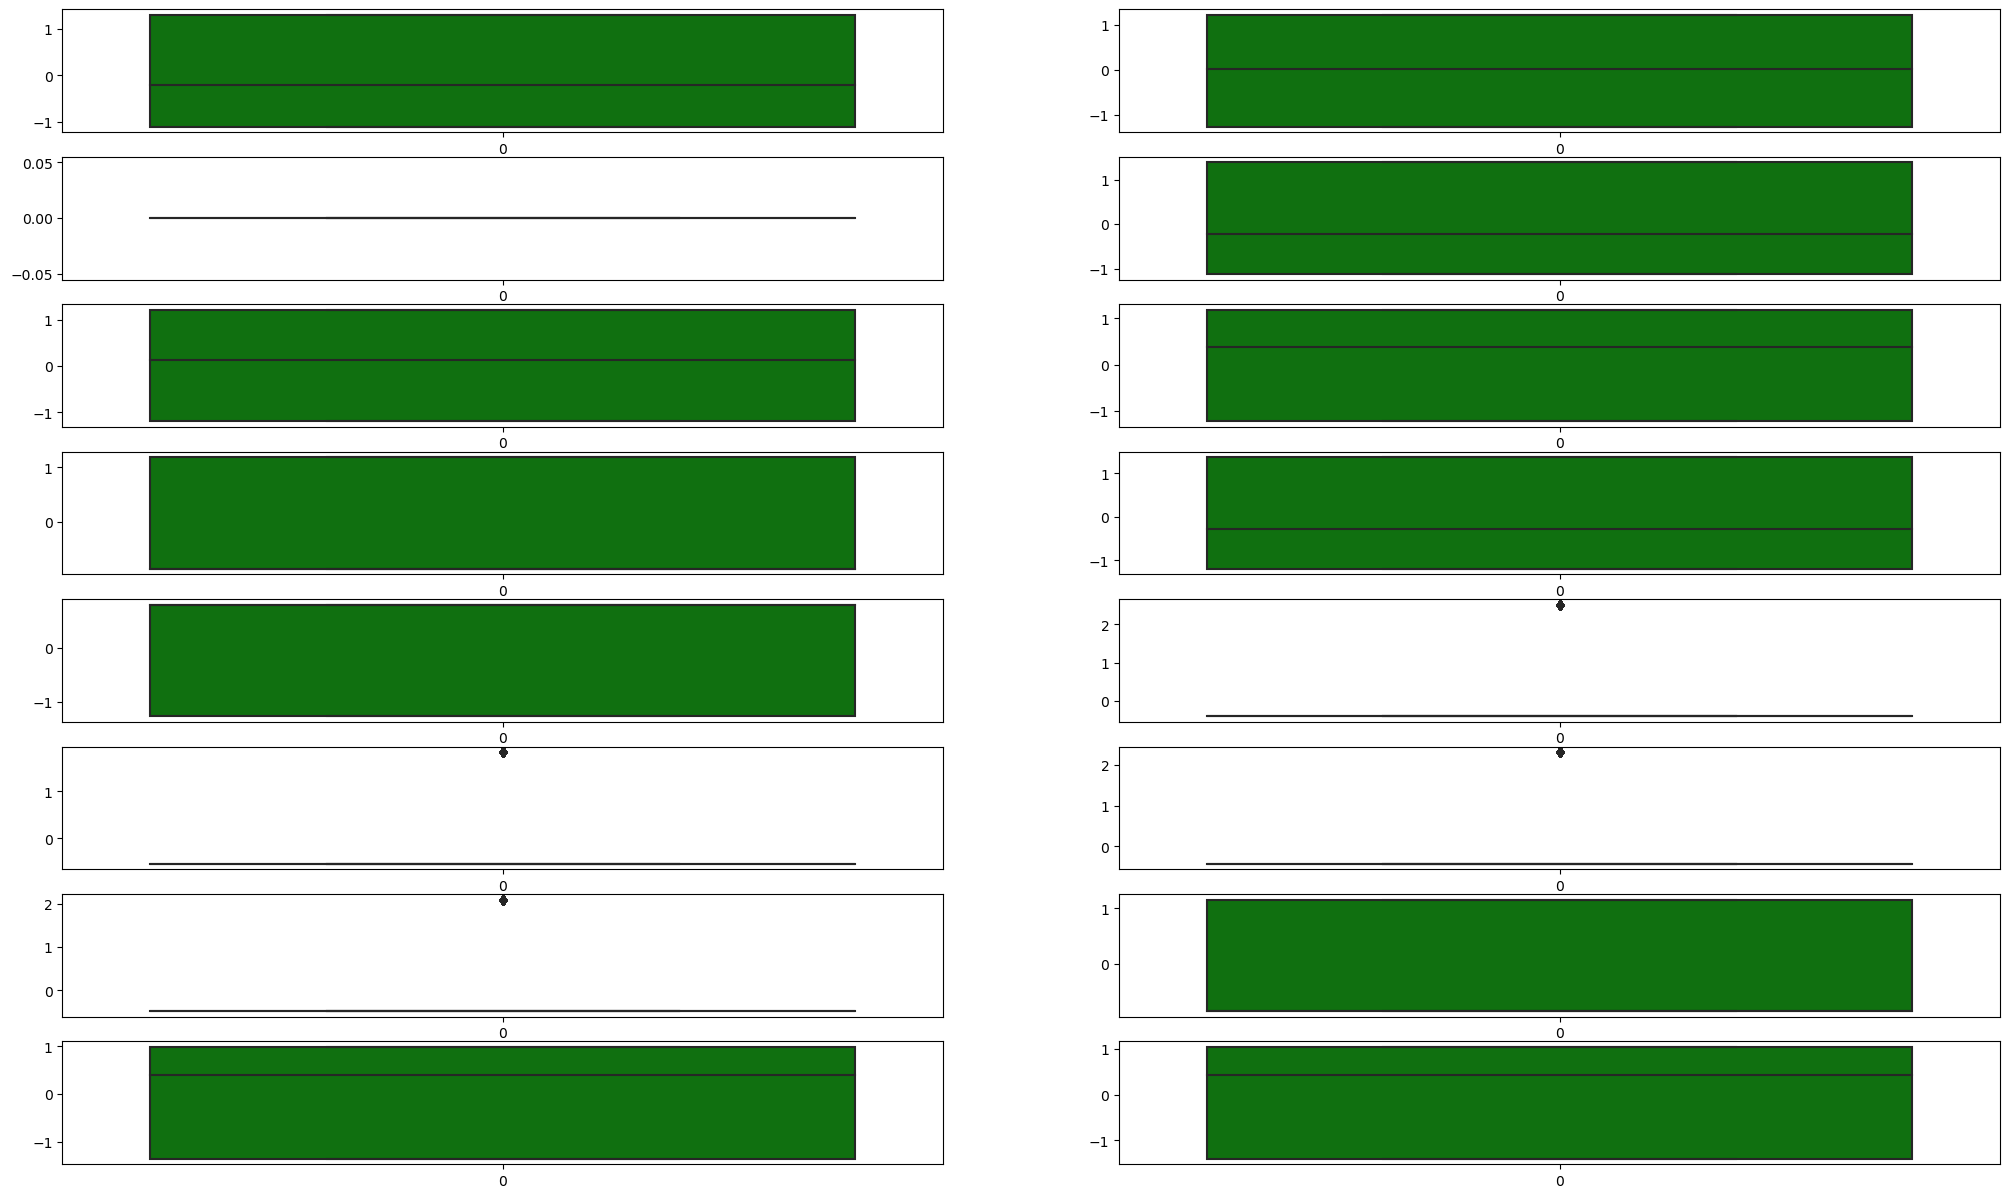

In [129]:
#after scaling down we can see the distribution have changed
r = X_train_1.columns

fig , ax = plt.subplots(8 , 2 , figsize=(25,15))
for i,subplot in zip(r,ax.flatten()):
    sns.boxplot(X_train_1[i],ax=subplot,color = 'g')

### now it's time for feature selection

In [130]:
!pip install scikit-learn

In [131]:
# checking constant variance value
from sklearn.feature_selection import VarianceThreshold

In [132]:
sklearn.__version__

'1.3.0'

In [133]:
var = VarianceThreshold(threshold=0.0)
var.fit(X_train_1)

VarianceThreshold()

In [134]:
var.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [135]:
c = X_train_1.columns[var.get_support()]
c

Index(['RevolvingUtilizationOfUnsecuredLines_yoe_h', 'age_yoe_h',
       'DebtRatio_yoe_h', 'NumberOfOpenCreditLinesAndLoans_yoe_h',
       'NumberRealEstateLoansOrLines_yoe_h',
       'NumberOfDependents_mean_replaced_yoe_h',
       'MonthlyIncome_mode_replaced_yoe_h', 'Gender_Male', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Rented_OwnHouse_Rented',
       'Occupation_re', 'Education_re'],
      dtype='object')

In [136]:
constant = X_train_1.columns[~var.get_support()]
len(constant)  # one column we can remove 

1

In [137]:
constant

Index(['NumberOfTime30-59DaysPastDueNotWorse_yoe_h'], dtype='object')

In [138]:
#let's find out the values in the NumberOfTime30-59DaysPastDueNotWorse_yoe_h
X_train_1['NumberOfTime30-59DaysPastDueNotWorse_yoe_h'].value_counts()

-0.0    134999
Name: NumberOfTime30-59DaysPastDueNotWorse_yoe_h, dtype: int64

In [139]:
#since all the values are literally same we dn't require the above column
X_train_1 = var.transform(X_train_1)
X_test_1 = var.transform(X_test_1)
X_train_1 = pd.DataFrame(X_train_1,columns=c)
X_test_1 = pd.DataFrame(X_test_1,columns=c)

In [140]:
len(X_train_1.columns)

15

In [141]:
## Quasi constant will check by giving some more variance point 
var1 = VarianceThreshold(threshold=0.1)
var1.fit(X_train_1)
c = X_train_1.columns[var1.get_support()]  #needed columns 
constant = X_train_1.columns[~var1.get_support()] #unwanted columns 

In [142]:
constant

Index([], dtype='object')

In [143]:
!pip install feature_engine

In [144]:
from feature_engine.selection import DropCorrelatedFeatures

In [145]:
cor = DropCorrelatedFeatures(threshold=0.85,method='pearson')
cor.fit(X_train_1[['RevolvingUtilizationOfUnsecuredLines_yoe_h', 'age_yoe_h',
       'DebtRatio_yoe_h', 'NumberOfOpenCreditLinesAndLoans_yoe_h',
       'NumberRealEstateLoansOrLines_yoe_h',
       'NumberOfDependents_mean_replaced_yoe_h',
       'MonthlyIncome_mode_replaced_yoe_h']])

DropCorrelatedFeatures(threshold=0.85)

In [146]:
cor.features_to_drop_
#no correalated feature

set()

### let's get started with the hypothesis testing 

In [147]:
X_train_1.shape, y_train.shape

((134999, 15), (134999,))

In [148]:
Y_train.head()

149883    Good
34945      Bad
120143    Good
56652     Good
17440     Good
Name: Good_Bad, dtype: object

In [149]:
from scipy.stats import pearsonr
corr = []
k = ['RevolvingUtilizationOfUnsecuredLines_yoe_h', 'age_yoe_h',
       'DebtRatio_yoe_h', 'NumberOfOpenCreditLinesAndLoans_yoe_h',
       'NumberRealEstateLoansOrLines_yoe_h',
       'NumberOfDependents_mean_replaced_yoe_h',
       'MonthlyIncome_mode_replaced_yoe_h']


for i in k:
    sol = pearsonr(X_train_1[i] , y_train)
    corr.append(sol)
corr = np.array(corr)
print(corr)

[[-2.34555503e-001  0.00000000e+000]
 [ 1.13440249e-001  0.00000000e+000]
 [-2.86206308e-002  7.14411858e-026]
 [ 3.00696568e-002  2.17626593e-028]
 [ 4.20068084e-002  8.68766998e-054]
 [-3.88083305e-002  3.65345862e-046]
 [ 6.04632064e-002  1.55280369e-109]]


<Axes: >

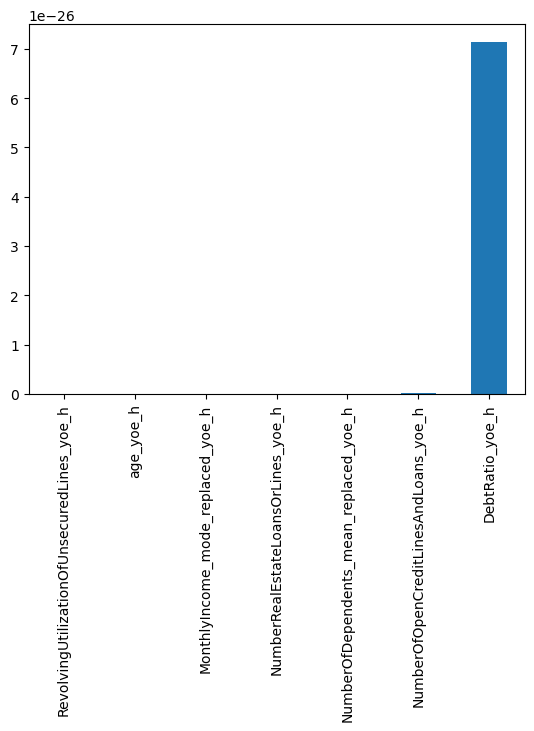

In [150]:
p_value_num = pd.Series(corr[: , 1],index=['RevolvingUtilizationOfUnsecuredLines_yoe_h', 'age_yoe_h',
       'DebtRatio_yoe_h', 'NumberOfOpenCreditLinesAndLoans_yoe_h',
       'NumberRealEstateLoansOrLines_yoe_h',
       'NumberOfDependents_mean_replaced_yoe_h',
       'MonthlyIncome_mode_replaced_yoe_h'])
p_value_num = p_value_num.sort_values(ascending=True)
p_value_num.plot.bar()

In [151]:
## removing DebitRatio colum from train and test 
X_train_1 = X_train_1.drop(['DebtRatio_yoe_h'],axis = 1)
X_test_1 = X_test_1.drop(['DebtRatio_yoe_h'],axis = 1)

In [152]:
X_train_1.columns

Index(['RevolvingUtilizationOfUnsecuredLines_yoe_h', 'age_yoe_h',
       'NumberOfOpenCreditLinesAndLoans_yoe_h',
       'NumberRealEstateLoansOrLines_yoe_h',
       'NumberOfDependents_mean_replaced_yoe_h',
       'MonthlyIncome_mode_replaced_yoe_h', 'Gender_Male', 'Region_East',
       'Region_North', 'Region_South', 'Region_West', 'Rented_OwnHouse_Rented',
       'Occupation_re', 'Education_re'],
      dtype='object')

In [153]:
X_test_1.head()

,RevolvingUtilizationOfUnsecuredLines_yoe_h,age_yoe_h,NumberOfOpenCreditLinesAndLoans_yoe_h,NumberRealEstateLoansOrLines_yoe_h,NumberOfDependents_mean_replaced_yoe_h,MonthlyIncome_mode_replaced_yoe_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented,Occupation_re,Education_re
0,-1.112363,0.897610,1.210485,1.173409,-0.852468,-1.237927,-1.265915,-0.397598,-0.543280,-0.430953,-0.478009,-0.862811,-0.184556,1.041463
1,-1.112363,-0.263077,-1.203565,0.367206,1.165263,0.182575,0.789942,-0.397598,1.840671,-0.430953,-0.478009,-0.862811,0.986889,0.431267
2,1.275705,-1.400697,-0.718048,-1.224298,-0.852468,-0.826723,-1.265915,-0.397598,-0.543280,2.320440,-0.478009,-0.862811,0.986889,-0.789125
3,1.275705,0.897610,0.515407,1.173409,1.165263,0.182575,-1.265915,-0.397598,1.840671,-0.430953,-0.478009,-0.862811,0.986889,-0.178929
4,1.275705,-1.282705,1.210485,-1.224298,-0.852468,-1.102790,0.789942,-0.397598,1.840671,-0.430953,-0.478009,-0.862811,0.986889,-0.789125


### Now for categorical feature we will be using chi square test

In [154]:
d = X_train_1[['Gender_Male', 'Region_East', 'Region_North',
       'Region_South', 'Region_West', 'Rented_OwnHouse_Rented', 'Occupation_re', 'Education_re']]
d.head()

## we can't use CHI2 test because of the negative value

,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented,Occupation_re,Education_re
0,0.789942,-0.397598,1.840671,-0.430953,-0.478009,1.159002,-0.184556,1.041463
1,0.789942,-0.397598,-0.543280,-0.430953,2.092013,-0.862811,0.986889,-0.789125
2,0.789942,-0.397598,-0.543280,-0.430953,2.092013,-0.862811,0.986889,-1.399321
3,0.789942,2.515105,-0.543280,-0.430953,-0.478009,1.159002,-1.356001,1.041463
4,0.789942,-0.397598,1.840671,-0.430953,-0.478009,-0.862811,0.986889,0.431267


In [155]:
len(X_train_1.columns)

14

In [156]:
len(X_test_1.columns)

14

In [161]:
## checking whether the data is balanced or not 

print('The value 1 in dependent variable = ',sum(y_train == 1))
print('The value 1 in dependent variable = ',sum(y_train == 0))

#for maintain data balacned we are using upsampling 
# !pip install imblearn 
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=2)

#X_train_res , y_train_res = sm.fit_resample(X_train_1 , y_train)
#print('--------------------------------------------------------------------------')

#print('The value 1 in dependent variable = ',sum(y_train_res == 1))
#print('The value 1 in dependent variable = ',sum(y_train_res == 0))



The value 1 in dependent variable =  125979
The value 1 in dependent variable =  9020


## Model Development 

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [163]:
#KNN
def knn(X_train , y_train_res,X_test_1 , y_test):
    reg = KNeighborsClassifier(n_neighbors=5)
    reg.fit(X_train , y_train)
    print('Accuracy:')
    print('Training accuracy = ',reg.score(X_train,y_train))
    print('Test accuracy = ',reg.score(X_test_1 , y_test))
    y_test_pred = reg.predict(X_test_1)
    print('Test data confusion_matrix : ',confusion_matrix(y_test,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test,y_test_pred))


In [164]:
# Logistic Regression 
def lg(X_train , y_train ,X_test_1 , y_test):
    reg1 = LogisticRegression()
    reg1.fit(X_train , y_train)
    print('Accuracy:')
    print('Training accuracy = ',reg1.score(X_train,y_train))
    print('Test accuracy = ',reg1.score(X_test_1,y_test))
    y_test_pred = reg1.predict(X_test_1)
    print('Test data confusion_matrix : ',confusion_matrix(y_test,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test,y_test_pred))
    

In [165]:
# Naive bayes 
def NB(X_train , y_train,X_test_1 , y_test):
    reg2 = GaussianNB()
    reg2.fit(X_train , y_train)
    print('Accuracy:')
    print('Training accuracy = ',reg2.score(X_train,y_train))
    print('Test accuracy = ',reg2.score(X_test_1,y_test))
    y_test_pred = reg2.predict(X_test_1)
    print('Test data confusion_matrix : ',confusion_matrix(y_test,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test,y_test_pred))
    

In [167]:
# Decision Tree
def DT(X_train , y_train,X_test_1 , y_test):
    reg3 = DecisionTreeClassifier(criterion='entropy')
    reg3.fit(X_train , y_train)
    print('Accuracy:')
    print('Training accuracy = ',reg3.score(X_train,y_train))
    print('Test accuracy = ',reg3.score(X_test_1,y_test))
    y_test_pred = reg3.predict(X_test_1)
    print('Test data confusion_matrix : ',confusion_matrix(y_test,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test,y_test_pred))

In [168]:
# Random Forest 
def RF(X_train , y_train,X_test_1 , y_test):
    reg4 = RandomForestClassifier()
    reg4.fit(X_train , y_train)
    print('Accuracy:')
    print('Training accuracy = ',reg4.score(X_train,y_train))
    print('Test accuracy = ',reg4.score(X_test_1,y_test))
    y_test_pred = reg4.predict(X_test_1)
    print('Test data confusion_matrix : ',confusion_matrix(y_test,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test,y_test_pred))
    

In [169]:
def info(X_train , y_train , X_test_1 , y_test):
    print('------------*------KNN-----*-----------')
    knn(X_train , y_train,X_test_1 , y_test)
    print('------------*------Logistic Regression-----*-----------')
    lg(X_train , y_train,X_test_1 , y_test)
    print('------------*------Naive Bayes-----*-----------')
    NB(X_train , y_train,X_test_1 , y_test)
    print('------------*------Decision Tree-----*-----------')
    DT(X_train , y_train,X_test_1 , y_test)
    print('------------*------Random Forest-----*-----------')
    RF(X_train , y_train,X_test_1 , y_test)
    

In [170]:
len(y_test) , len(X_test_1)

(15001, 15001)

In [171]:
len(X_train_1) , len(y_train)

(134999, 134999)

In [172]:
df.shape

(150002, 18)

In [176]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines_yoe_h,age_yoe_h,NumberOfTime30-59DaysPastDueNotWorse_yoe_h,DebtRatio_yoe_h,NumberOfOpenCreditLinesAndLoans_yoe_h,NumberRealEstateLoansOrLines_yoe_h,NumberOfDependents_mean_replaced_yoe_h,MonthlyIncome_mode_replaced_yoe_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented,Occupation_re,Education_re
149883,0.028655,17.102734,-0.0,0.206564,2.529692,0.961001,0.449138,61.392872,1.0,0.0,1.0,0.0,0.0,1.0,2.0,4.0
34945,0.288394,15.359271,0.0,0.492462,2.529692,0.636561,0.449138,48.574047,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0
120143,0.245834,19.443287,-0.0,0.198022,3.609993,0.961001,-0.000000,61.392872,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0
56652,0.253755,20.558779,-0.0,0.214197,4.047033,-0.000000,0.449138,53.174213,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
17440,0.230134,15.359271,-0.0,0.354409,3.370387,0.961001,0.449138,48.574047,1.0,0.0,1.0,0.0,0.0,0.0,4.0,3.0


In [175]:
X_train_1.head()

,RevolvingUtilizationOfUnsecuredLines_yoe_h,age_yoe_h,NumberOfOpenCreditLinesAndLoans_yoe_h,NumberRealEstateLoansOrLines_yoe_h,NumberOfDependents_mean_replaced_yoe_h,MonthlyIncome_mode_replaced_yoe_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented,Occupation_re,Education_re
0,-1.102858,-0.423256,-1.197815,1.187274,1.186962,1.369125,0.789942,-0.397598,1.840671,-0.430953,-0.478009,1.159002,-0.184556,1.041463
1,1.300869,-1.253779,-1.197815,0.373111,1.186962,-1.193598,0.789942,-0.397598,-0.543280,-0.430953,2.092013,-0.862811,0.986889,-0.789125
2,0.907003,0.691699,0.526237,1.187274,-0.852468,1.369125,0.789942,-0.397598,-0.543280,-0.430953,2.092013,-0.862811,0.986889,-1.399321
3,0.980309,1.223079,1.223709,-1.224298,1.186962,-0.273939,0.789942,2.515105,-0.543280,-0.430953,-0.478009,1.159002,-1.356001,1.041463
4,0.761704,-1.253779,0.143851,1.187274,1.186962,-1.193598,0.789942,-0.397598,1.840671,-0.430953,-0.478009,-0.862811,0.986889,0.431267


In [177]:
info(X_train_1 , y_train , X_test_1,y_test)

------------*------KNN-----*-----------
Accuracy:
Training accuracy =  0.9503625952784835
Test accuracy =  0.9384707686154257
Test data confusion_matrix :  [[  308   698]
 [  225 13770]]
Test data classification_report :                precision    recall  f1-score   support

           0       0.58      0.31      0.40      1006
           1       0.95      0.98      0.97     13995

    accuracy                           0.94     15001
   macro avg       0.76      0.65      0.68     15001
weighted avg       0.93      0.94      0.93     15001

------------*------Logistic Regression-----*-----------
Accuracy:
Training accuracy =  0.9338143245505522
Test accuracy =  0.9347376841543897
Test data confusion_matrix :  [[   71   935]
 [   44 13951]]
Test data classification_report :                precision    recall  f1-score   support

           0       0.62      0.07      0.13      1006
           1       0.94      1.00      0.97     13995

    accuracy                           0.93     1

### Selecting the best one using AUC and ROC 

In [179]:
r1 = KNeighborsClassifier()
r1.fit(X_train_1 , y_train)
y_k = r1.predict_proba(X_test_1)[:,1]

In [180]:
y_k

array([1. , 1. , 1. , ..., 0.6, 1. , 1. ])

In [181]:
from sklearn.metrics import roc_auc_score,roc_curve

In [182]:
fpr, tpr, threshold = roc_curve(y_test, y_k)

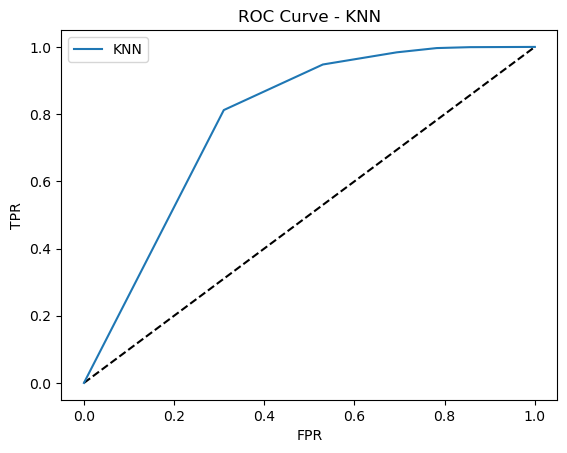

In [184]:
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label = "KNN")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - KNN")
plt.legend(loc = 0)
plt.show()

In [185]:
# Model importing 
r1 = KNeighborsClassifier()
r2 = LogisticRegression()
r3 = GaussianNB()
r4 = DecisionTreeClassifier()
r5 = RandomForestClassifier()

# Model training 
r1.fit(X_train_1 , y_train)
r2.fit(X_train_1 , y_train)
r3.fit(X_train_1 , y_train)
r4.fit(X_train_1 , y_train)
r5.fit(X_train_1 , y_train)


# Model testing 
y_K = r1.predict_proba(X_test_1)[:,1]
y_L = r2.predict_proba(X_test_1)[:,1]
y_N = r3.predict_proba(X_test_1)[:,1]
y_D = r4.predict_proba(X_test_1)[:,1]
y_R = r5.predict_proba(X_test_1)[:,1]


# finding FPR and TPR for all models 

fprk, tprk, threshold = roc_curve(y_test, y_K)  #KNN
fprL, tprL, threshold = roc_curve(y_test, y_L)  # LR
fprN, tprN, threshold = roc_curve(y_test, y_N)  # NB
fprD, tprD, threshold = roc_curve(y_test, y_D)  # DT
fprR, tprR, threshold = roc_curve(y_test, y_R) # RF

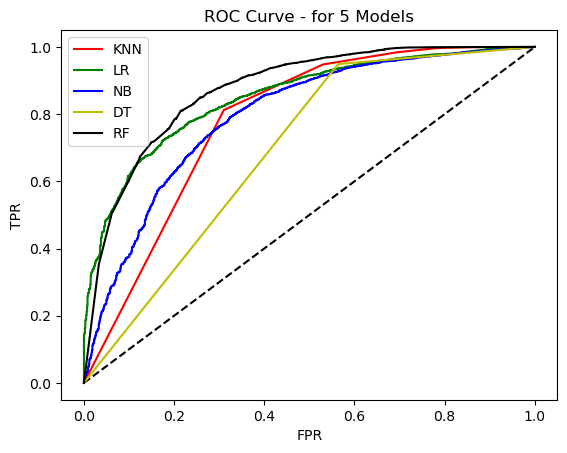

In [186]:

plt.plot([0, 1], [0, 1], "k--")

plt.plot(fprk, tprk, label = "KNN",color = 'r')
plt.plot(fprL, tprL, label = "LR",color = 'g')
plt.plot(fprN, tprN, label = "NB" , color = 'b')
plt.plot(fprD, tprD, label = "DT",color = 'y')
plt.plot(fprR, tprR, label = "RF" , color = 'black')

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - for 5 Models")
plt.legend(loc = 0)
plt.show()


In [ ]:
## Hyper parameter for Logistic regression

In [187]:
from sklearn.model_selection import GridSearchCV


In [188]:
reg_final = LogisticRegression()

In [189]:
parameters = {
    
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'tol' : [1e-1 , 1e-2 , 1e-3 , 1e-4],
    'class_weight' : ['balanced',None],
    'max_iter' : [50,100,130,150,200],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class' : ['auto', 'ovr', 'multinomial'],
    'verbose' : [0,1],
    'n_jobs' : [1,-1]
    
}

In [190]:
from sklearn.model_selection import cross_val_score

In [191]:
gs = GridSearchCV(estimator=reg_final , 
                 param_grid=parameters,
                 scoring='accuracy',
                 cv = 10 , 
                 n_jobs=-1)

In [193]:
X_train_1

,RevolvingUtilizationOfUnsecuredLines_yoe_h,age_yoe_h,NumberOfOpenCreditLinesAndLoans_yoe_h,NumberRealEstateLoansOrLines_yoe_h,NumberOfDependents_mean_replaced_yoe_h,MonthlyIncome_mode_replaced_yoe_h,Gender_Male,Region_East,Region_North,Region_South,Region_West,Rented_OwnHouse_Rented,Occupation_re,Education_re
0,-1.102858,-0.423256,-1.197815,1.187274,1.186962,1.369125,0.789942,-0.397598,1.840671,-0.430953,-0.478009,1.159002,-0.184556,1.041463
1,1.300869,-1.253779,-1.197815,0.373111,1.186962,-1.193598,0.789942,-0.397598,-0.543280,-0.430953,2.092013,-0.862811,0.986889,-0.789125
2,0.907003,0.691699,0.526237,1.187274,-0.852468,1.369125,0.789942,-0.397598,-0.543280,-0.430953,2.092013,-0.862811,0.986889,-1.399321
3,0.980309,1.223079,1.223709,-1.224298,1.186962,-0.273939,0.789942,2.515105,-0.543280,-0.430953,-0.478009,1.159002,-1.356001,1.041463
4,0.761704,-1.253779,0.143851,1.187274,1.186962,-1.193598,0.789942,-0.397598,1.840671,-0.430953,-0.478009,-0.862811,0.986889,0.431267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134994,-1.102858,1.223079,1.223709,0.373111,-0.852468,-1.193598,-1.265915,-0.397598,-0.543280,-0.430953,-0.478009,-0.862811,0.986889,-1.399321
134995,-1.102858,-0.308251,0.885052,0.373111,1.186962,1.369125,0.789942,-0.397598,-0.543280,-0.430953,-0.478009,-0.862811,-1.356001,-1.399321
134996,0.811403,-0.539119,0.526237,1.187274,1.186962,-0.273939,-1.265915,-0.397598,1.840671,-0.430953,-0.478009,1.159002,0.401166,0.431267
134997,-0.974797,1.223079,-1.197815,1.187274,-0.852468,1.155545,0.789942,-0.397598,1.840671,-0.430953,-0.478009,-0.862811,0.986889,-0.789125


In [ ]:

grid_search = gs.fit(X_train_res, y_train_res)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)


### Since Logistic Regression working Better I am using Logistic Regression for testing unknown data 

In [196]:
import pickle

In [197]:
with open('credit.pkl' , 'wb') as f:
    pickle.dump(r2 , f)

In [198]:

model = pickle.load(open('credit.pkl' , 'rb'))

In [199]:
model.predict([[1,2,3,4,5,6,7,8,9,11,12,13,14,15]])  # just checking 

array([0])

In [200]:
if model.predict([[1,2,3,4,5,6,7,8,9,11,12,13,14,15]])[0] == 0:
    print('Fraud Transcation')
else:
    print('Good Transcation')

Fraud Transcation
